# <center><strong> House Price prediction </strong></center>

----------------------------

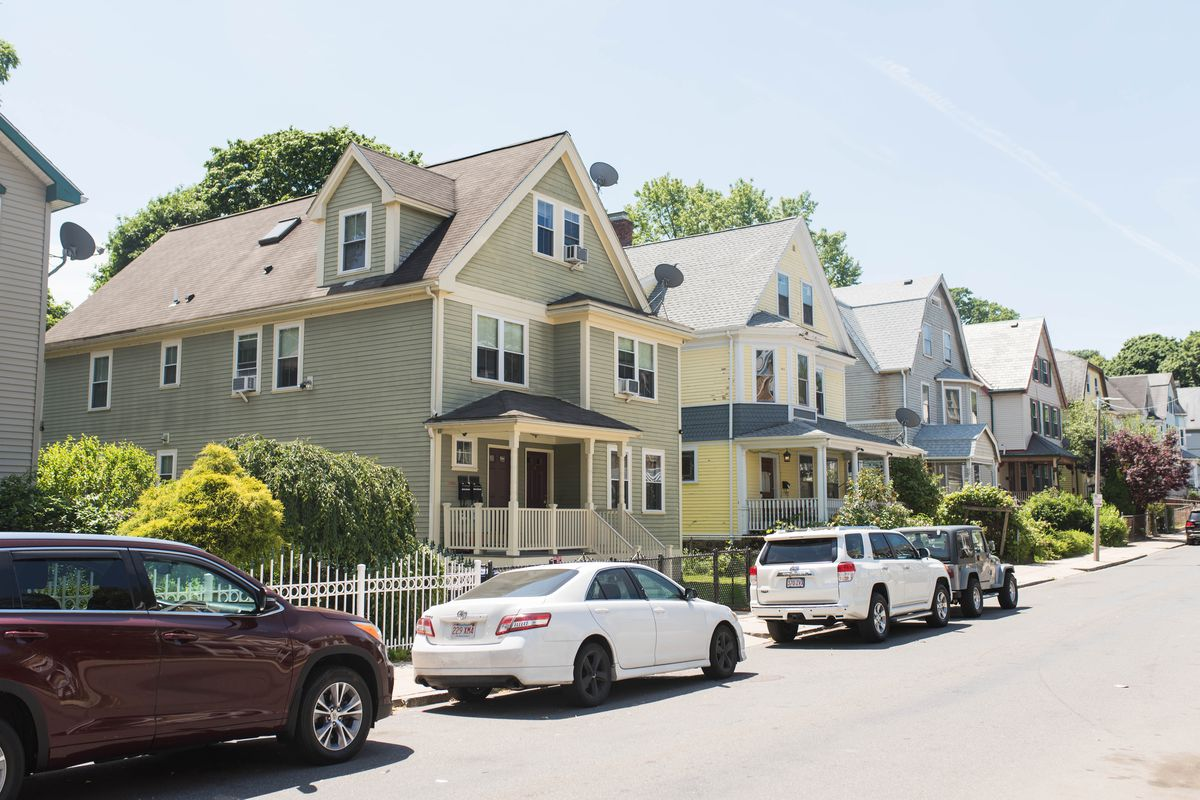

In [1]:
from IPython.display import Image
Image(filename='hs.JPG')

--------------------------------

## <center><strong> Project Overview </strong></center>

#### **A simple yet challenging project, to predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc. The dataset is small yet, it's complexity arises due to the fact that it has strong multicollinearity. Can you overcome these obstacles & build a decent predictive model?**

-----------------------------------
----------------------------------

## **Import Libraries**

In [2]:
from pandas import read_csv, DataFrame, concat
from matplotlib.pyplot import show, suptitle, subplots_adjust, tight_layout, subplots,scatter
from matplotlib.pyplot import figure, title, xlabel, ylabel, grid, xticks, tight_layout
from numpy import nan,log,inf
from seaborn import kdeplot, heatmap, histplot, boxplot, countplot, scatterplot,kdeplot,lmplot,lineplot,violinplot,regplot,jointplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
from pickle import dump

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

------------------------------------
----------------------------------
-----------------------------------

## **Exploratory Data Analysis (EDA)**

### **Initial Data Understanding**

 - **Data loading and Inspection**
 - **Data Types**
 - **Missing Values**
 - **Duplicates**

----------------------------------

In [3]:
df_train = read_csv("train.csv")

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print(f'shape_train: {df_train.shape}')

shape_train: (1460, 81)


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
for i in df_train.columns:
    print(i," : ",df_train[i].isnull().sum())

Id  :  0
MSSubClass  :  0
MSZoning  :  0
LotFrontage  :  259
LotArea  :  0
Street  :  0
Alley  :  1369
LotShape  :  0
LandContour  :  0
Utilities  :  0
LotConfig  :  0
LandSlope  :  0
Neighborhood  :  0
Condition1  :  0
Condition2  :  0
BldgType  :  0
HouseStyle  :  0
OverallQual  :  0
OverallCond  :  0
YearBuilt  :  0
YearRemodAdd  :  0
RoofStyle  :  0
RoofMatl  :  0
Exterior1st  :  0
Exterior2nd  :  0
MasVnrType  :  872
MasVnrArea  :  8
ExterQual  :  0
ExterCond  :  0
Foundation  :  0
BsmtQual  :  37
BsmtCond  :  37
BsmtExposure  :  38
BsmtFinType1  :  37
BsmtFinSF1  :  0
BsmtFinType2  :  38
BsmtFinSF2  :  0
BsmtUnfSF  :  0
TotalBsmtSF  :  0
Heating  :  0
HeatingQC  :  0
CentralAir  :  0
Electrical  :  1
1stFlrSF  :  0
2ndFlrSF  :  0
LowQualFinSF  :  0
GrLivArea  :  0
BsmtFullBath  :  0
BsmtHalfBath  :  0
FullBath  :  0
HalfBath  :  0
BedroomAbvGr  :  0
KitchenAbvGr  :  0
KitchenQual  :  0
TotRmsAbvGrd  :  0
Functional  :  0
Fireplaces  :  0
FireplaceQu  :  690
GarageType  :  81
Gara

In [9]:
df_train.duplicated().sum()

0

------------------------------

### 2. **Basic Statistical Overview**

- #### Summary Statistical : **describe()**

In [10]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [11]:
df_train.select_dtypes(include='object').describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


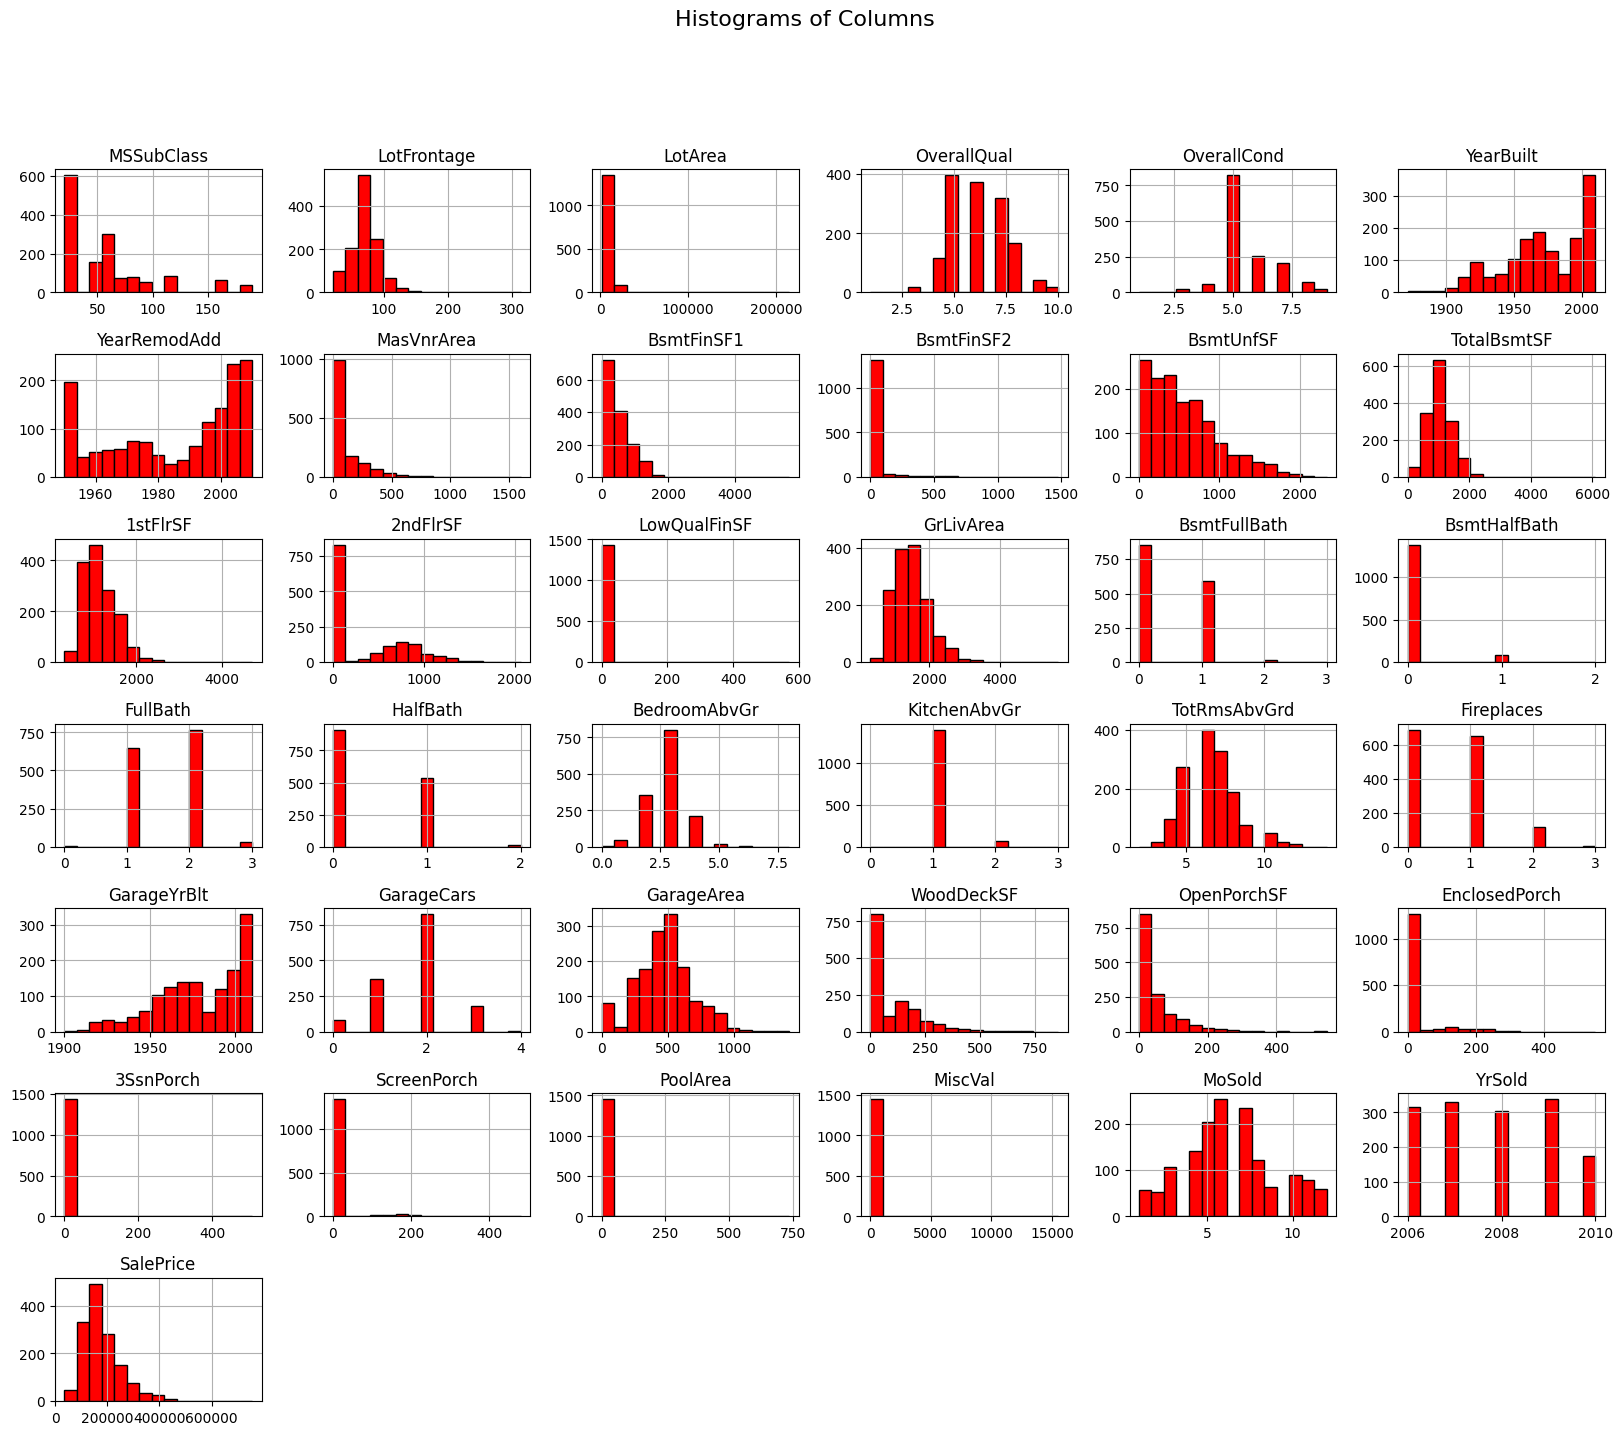

In [12]:
df_train.drop('Id',axis=1).hist(bins=15, figsize=(20, 16), color='red', edgecolor='black')
suptitle('Histograms of Columns', fontsize=16)
subplots_adjust(hspace=0.5)  
show()

------------------------------------

- #### Summary Statistical : **Value_counts()**

In [13]:
df_train['YearRemodAdd'].value_counts()

YearRemodAdd
1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1986      5
1952      5
1983      5
1951      4
Name: count, Length: 61, dtype: int64

In [14]:
df_train['YearRemodAdd'].unique()

array([2003, 1976, 2002, 1970, 2000, 1995, 2005, 1973, 1950, 1965, 2006,
       1962, 2007, 1960, 2001, 1967, 2004, 2008, 1997, 1959, 1990, 1955,
       1983, 1980, 1966, 1963, 1987, 1964, 1972, 1996, 1998, 1989, 1953,
       1956, 1968, 1981, 1992, 2009, 1982, 1961, 1993, 1999, 1985, 1979,
       1977, 1969, 1958, 1991, 1971, 1952, 1975, 2010, 1984, 1986, 1994,
       1988, 1954, 1957, 1951, 1978, 1974], dtype=int64)

--------------------------
------------------------

## **Distribution of Variables**

- **Numerical Features (KDE)**

----------------------------

In [15]:
df_train['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

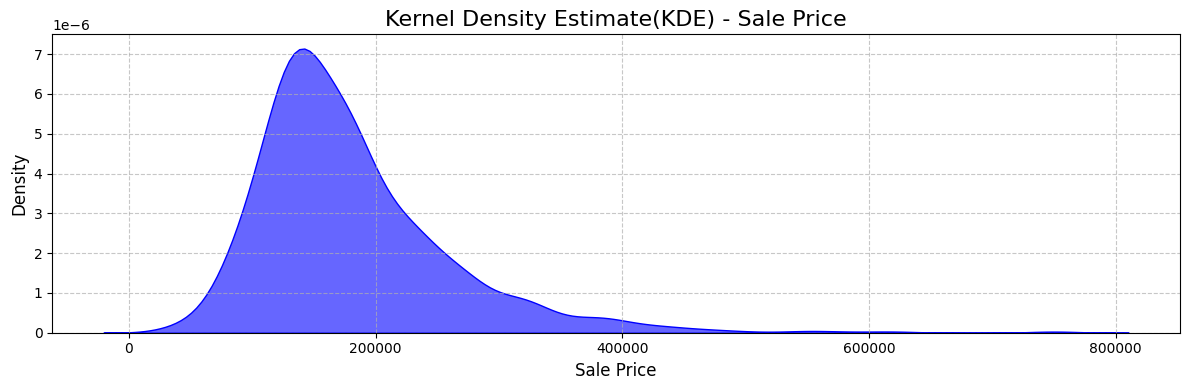

In [16]:
figure(figsize=(12,	4))
kdeplot(df_train['SalePrice'], fill=True,	color='blue', alpha=0.6)
title(f'Kernel Density Estimate(KDE) - Sale Price',	fontsize=16)
xlabel('Sale Price', fontsize=12)
ylabel('Density', fontsize=12)
grid(True, linestyle='--', alpha=0.7)
tight_layout()
show()

- ##### **Peak Concentration**: The highest density of sale prices appears to be around the $150,000 to $200,000 range. This suggests that the majority of houses in dataset were sold within this price bracket.

- ##### **Decreasing Density with Increasing Price**: As the sale price increases beyond the peak, the density of the distribution rapidly declines. This indicates that fewer and fewer houses were sold at higher price points.

- ##### **Long Right Tail**: The presence of the long right tail, extending towards $800,000 and beyond, signifies the existence of some relatively expensive properties in dataset. These higher-priced sales are less frequent but still contribute to the overall distribution.

- ##### **Limited Low-Priced Sales**: The density is very low for sale prices below approximately $50,000, suggesting that there are relatively few very low-priced properties in dataset.
 
##### The sale price distribution in dataset is characterized by a concentration of sales in the $150,000 to $200,000 range, with a decreasing number of sales as the price increases, and a presence of some high-value properties that create a positive skew.

-------------------------

### **Checking Correlation between the Features**

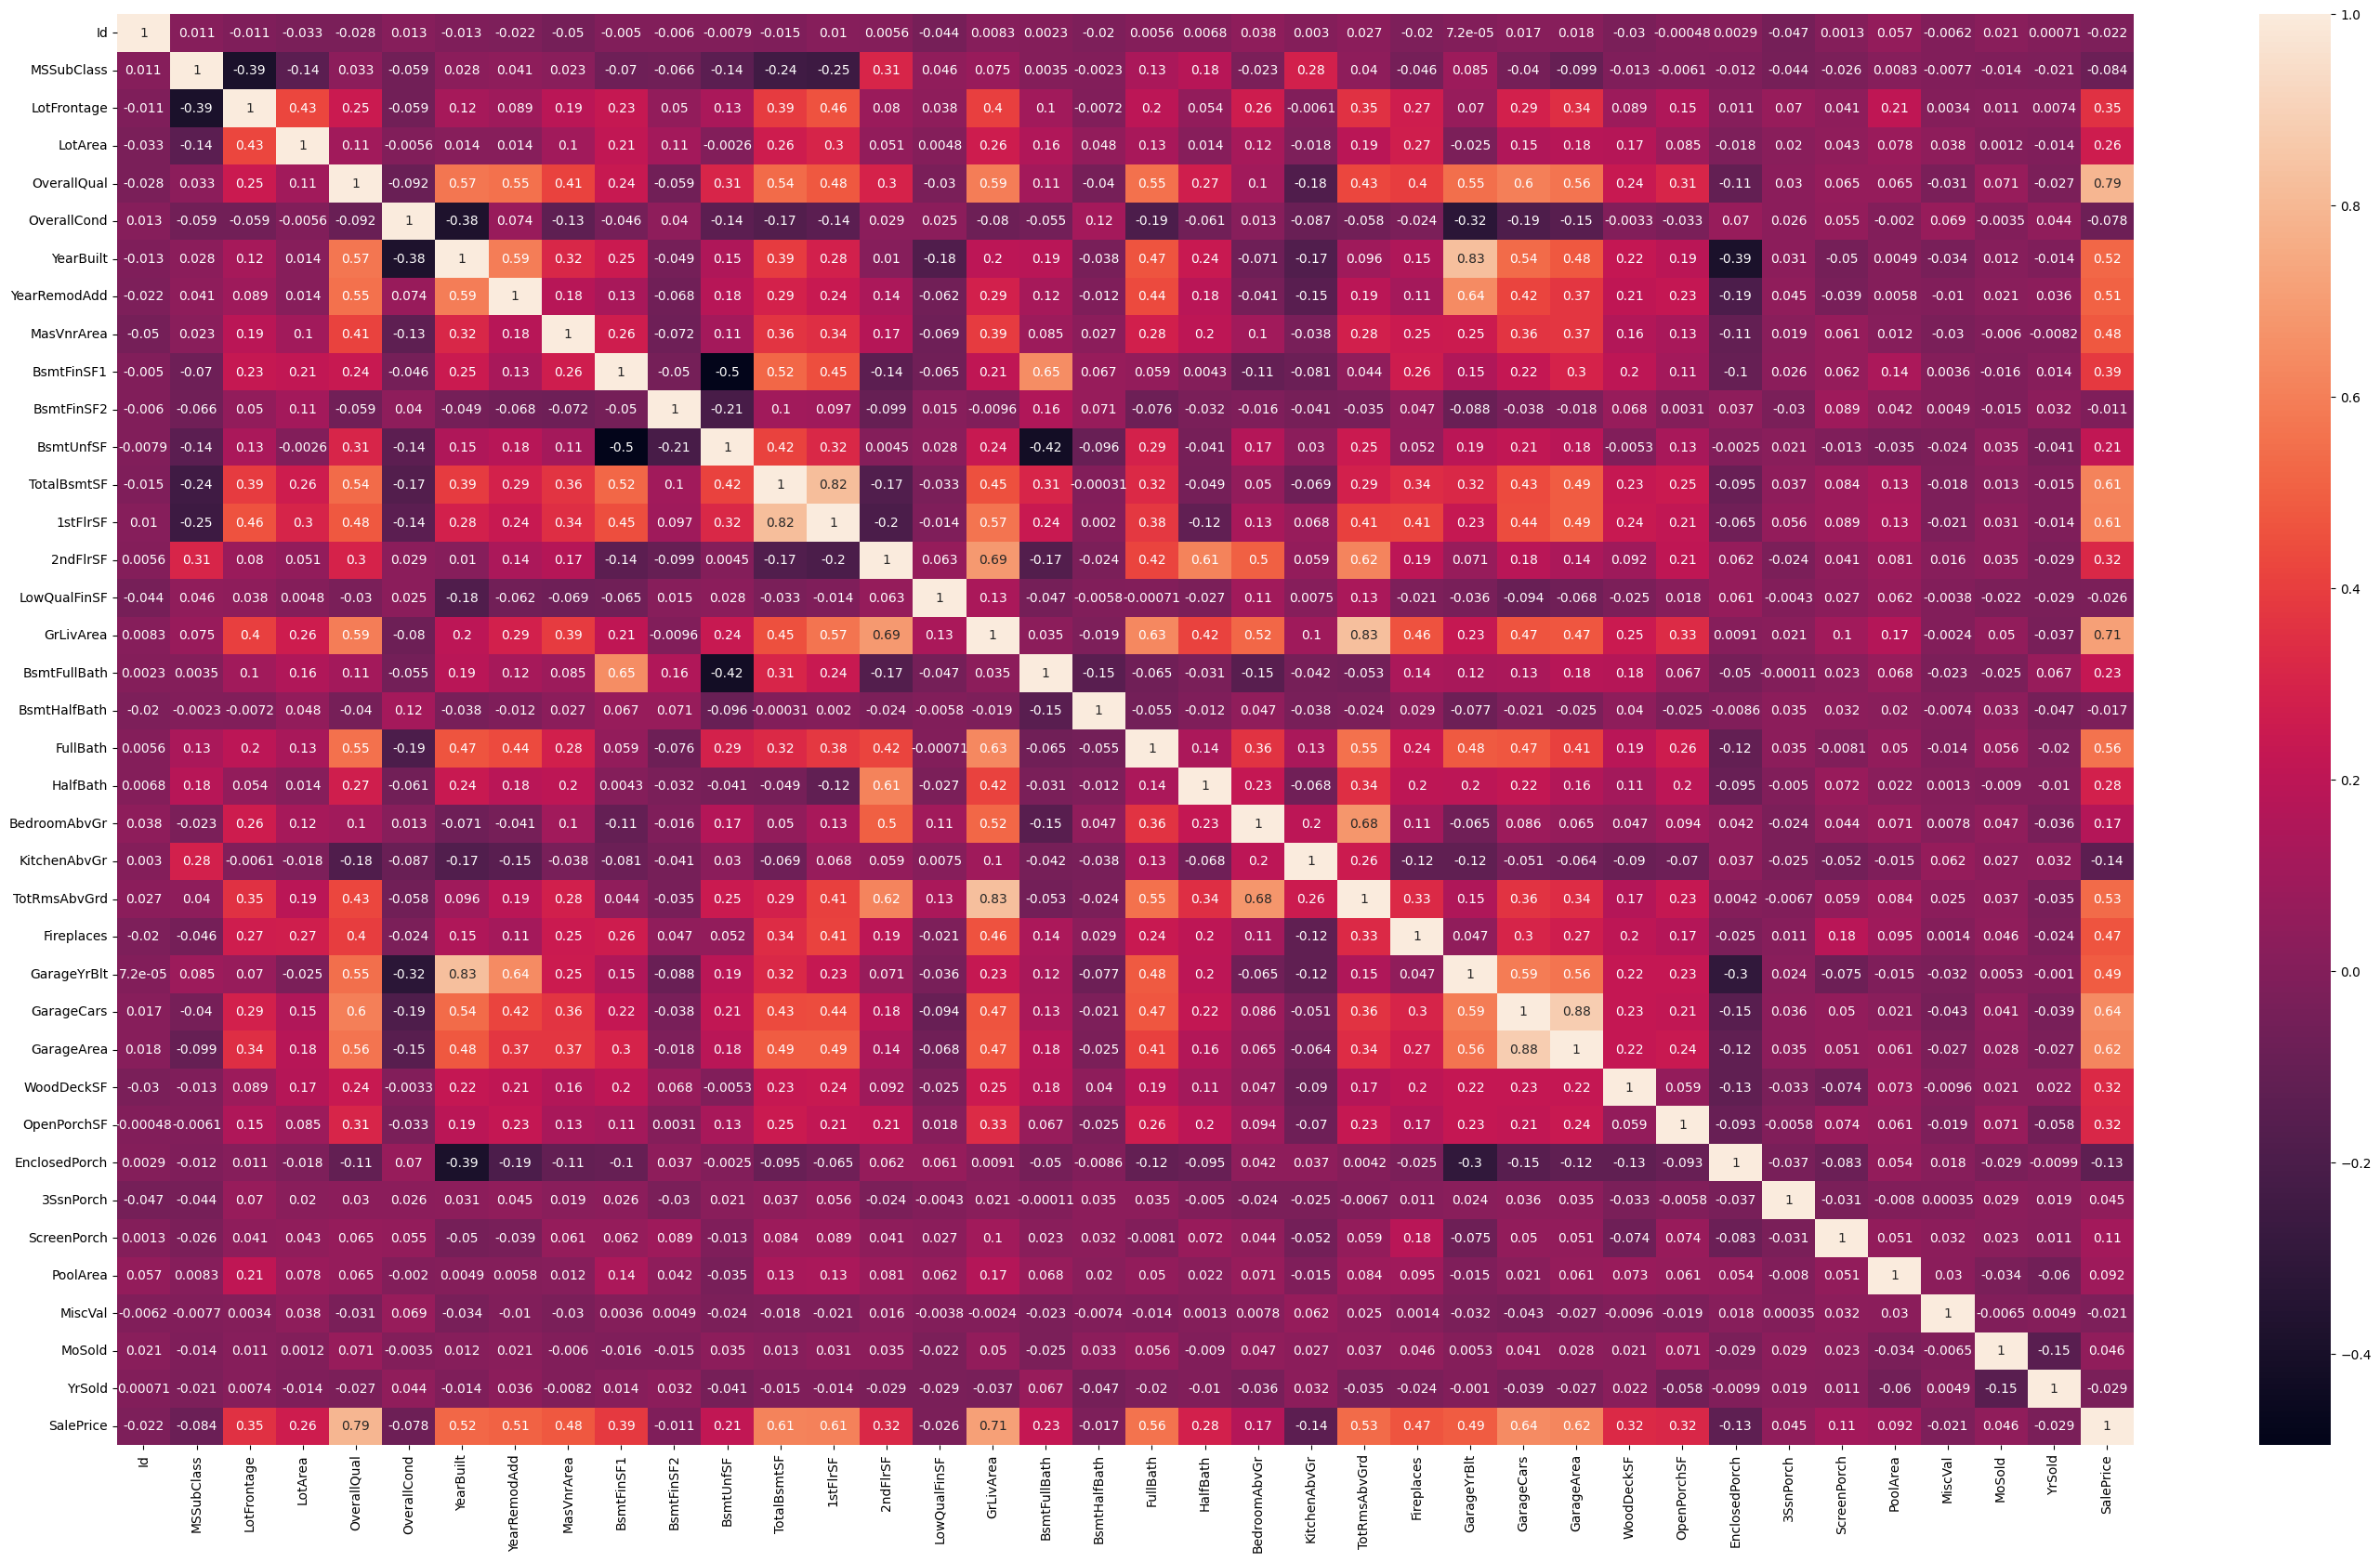

In [17]:
figure(figsize=(35,	20))
heatmap(df_train.select_dtypes(include='number').corr(), annot=True)
show()

------------------------------------

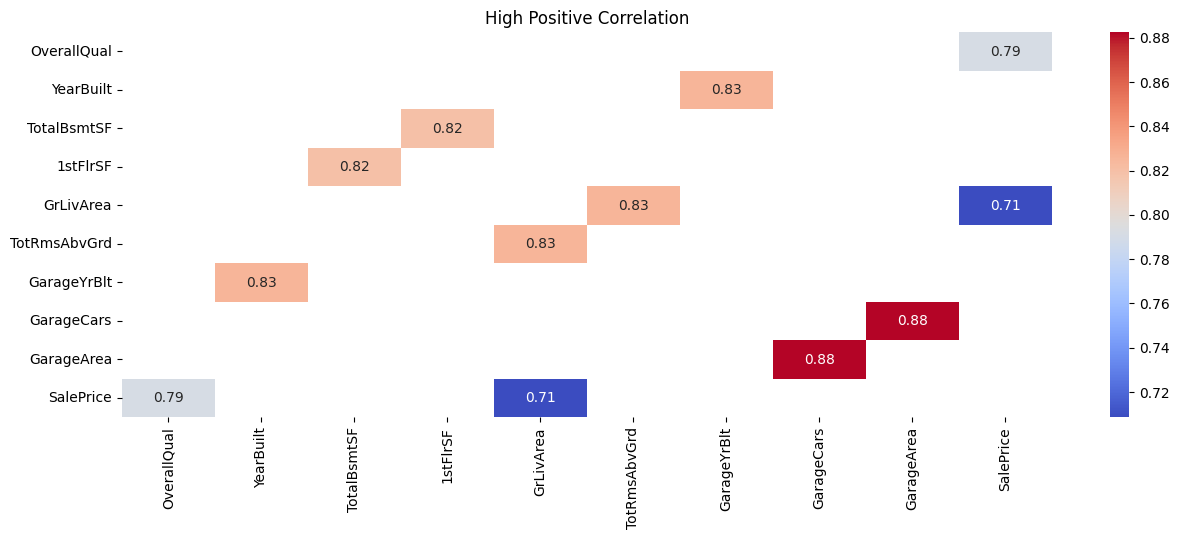

In [18]:
# function to extract high positive correlated columns
def get_high_corr(df_train, threshold):
    corr = df_train.select_dtypes('number').corr()
    high_corr = corr[(corr >= threshold) & (corr != 1.000)]
    high_corr = high_corr.dropna(how='all', axis=1).dropna(how='all', axis=0)
    return high_corr

# get high positive correlated columns
high_corr = get_high_corr(df_train, 0.7)

# plot high positive correlated columns
figure(figsize=(15, 5))
plot = heatmap(high_corr, annot=True, cmap='coolwarm')
plot.set_title('High Positive Correlation')
show()

- ##### There is a high positive correlation (0.88) between **GarageCars** and **GarageArea**
- ##### There is a high positive correlation (0.83) between **GarageYrBlt** and **YearBuilt**
- ##### There is a high positive correlation (0.83) between **TotRmsAbvGrd** and **GrLivArea**
- ##### There is a high positive correlation (0.82) between **TotalBsmtSF** and **1stFlrSF**
- ##### There is a high positive correlation (0.79) between **OverallQual** and **SalePrice**
- ##### There is a high positive correlation (0.71) between **GrLivArea** and **SalePrice**
------------------------------------------------------------------------------------------------

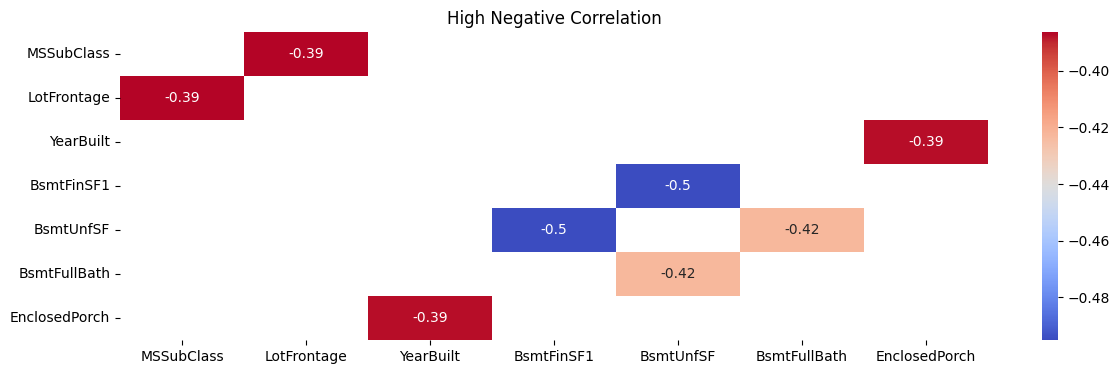

In [20]:
# function to extract high negative correlated columns
def get_high_corr(df_train, threshold):
    corr = df_train.select_dtypes('number').corr()
    high_corr = corr[(corr <= threshold) & (corr != 1.000)]
    high_corr = high_corr.dropna(how='all', axis=1).dropna(how='all', axis=0)
    return high_corr

# get high negative correlated columns
high_corr = get_high_corr(df_train, -0.38)

# plot high negative correlated columns
figure(figsize=(14, 4))
plot = heatmap(high_corr, annot=True, cmap='coolwarm')
plot.set_title('High Negative Correlation')
show()

- ##### There is a high negative correlation (-0.5) between **BsmtFinSF1r** and **BsmtUnfSF**
- ##### There is a high negative correlation (-0.42) between **BsmtFullBath** and **BsmtUnfSF**
- ##### There is a high negative correlation (-0.39) between **EnclosedPorch** and **YearBuilt**

-------------------------------
---------------------------------------------
---------------------------------------------

## **Data cleaning**

----------------------------------

In [ ]:
for i in df_train.columns:
    print(i," : ",df_train[i].isnull().sum())

Id  :  0
MSSubClass  :  0
MSZoning  :  0
LotFrontage  :  259
LotArea  :  0
Street  :  0
Alley  :  1369
LotShape  :  0
LandContour  :  0
Utilities  :  0
LotConfig  :  0
LandSlope  :  0
Neighborhood  :  0
Condition1  :  0
Condition2  :  0
BldgType  :  0
HouseStyle  :  0
OverallQual  :  0
OverallCond  :  0
YearBuilt  :  0
YearRemodAdd  :  0
RoofStyle  :  0
RoofMatl  :  0
Exterior1st  :  0
Exterior2nd  :  0
MasVnrType  :  872
MasVnrArea  :  8
ExterQual  :  0
ExterCond  :  0
Foundation  :  0
BsmtQual  :  37
BsmtCond  :  37
BsmtExposure  :  38
BsmtFinType1  :  37
BsmtFinSF1  :  0
BsmtFinType2  :  38
BsmtFinSF2  :  0
BsmtUnfSF  :  0
TotalBsmtSF  :  0
Heating  :  0
HeatingQC  :  0
CentralAir  :  0
Electrical  :  1
1stFlrSF  :  0
2ndFlrSF  :  0
LowQualFinSF  :  0
GrLivArea  :  0
BsmtFullBath  :  0
BsmtHalfBath  :  0
FullBath  :  0
HalfBath  :  0
BedroomAbvGr  :  0
KitchenAbvGr  :  0
KitchenQual  :  0
TotRmsAbvGrd  :  0
Functional  :  0
Fireplaces  :  0
FireplaceQu  :  690
GarageType  :  81
Gara

In [ ]:
# sum of nulls >= 30 for all data
for column in df_train.columns:
    SumOfNulls = df_train[column].isnull().sum()
    if SumOfNulls > 30:
       print(f'{column} : {SumOfNulls}')

LotFrontage : 259
Alley : 1369
MasVnrType : 872
BsmtQual : 37
BsmtCond : 37
BsmtExposure : 38
BsmtFinType1 : 37
BsmtFinType2 : 38
FireplaceQu : 690
GarageType : 81
GarageYrBlt : 81
GarageFinish : 81
GarageQual : 81
GarageCond : 81
PoolQC : 1453
Fence : 1179
MiscFeature : 1406


In [ ]:
df_train = df_train.drop(['Id','EnclosedPorch','BsmtHalfBath','LowQualFinSF','MiscFeature','Fence','PoolQC','FireplaceQu','MasVnrType','Alley','3SsnPorch'
                       ,'3SsnPorch','ScreenPorch','PoolArea','MiscVal','MiscVal','BsmtFinSF2','Fireplaces'],axis=1)

In [ ]:
df_train = df_train.dropna()

In [ ]:
df_train.shape

(1094, 65)

In [ ]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,0,61,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,TA,TA,Y,298,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,0,42,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,TA,Y,0,35,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,TA,TA,Y,192,84,12,2008,WD,Normal,250000


In [ ]:
df_train['WoodDeckSF'].value_counts()

WoodDeckSF
0      559
192     35
100     30
144     27
168     23
      ... 
326      1
35       1
298      1
78       1
736      1
Name: count, Length: 221, dtype: int64

In [ ]:
df_train['OpenPorchSF'].value_counts()

OpenPorchSF
0      470
36      24
45      16
20      16
48      14
      ... 
94       1
406      1
101      1
285      1
41       1
Name: count, Length: 176, dtype: int64

In [ ]:
df_train['MasVnrArea'].value_counts()

MasVnrArea
0.0      638
108.0      7
16.0       7
72.0       6
80.0       6
        ... 
285.0      1
921.0      1
762.0      1
594.0      1
119.0      1
Name: count, Length: 279, dtype: int64

In [ ]:
# transform from flaot to int
df_train['MasVnrArea'] = df_train['MasVnrArea'].astype(int)

In [ ]:
df_train['MasVnrArea'].value_counts()

MasVnrArea
0      638
108      7
16       7
72       6
80       6
      ... 
285      1
921      1
762      1
594      1
119      1
Name: count, Length: 279, dtype: int64

In [ ]:
df_train['WoodDeckSF'].mean()

94.3418647166362

In [ ]:
df_train['MasVnrArea'].mean()

109.85557586837294

In [ ]:
# replace 0 wirh 'nan' for train data

df_train['WoodDeckSF'] = df_train['WoodDeckSF'].replace(0,nan)
df_train['OpenPorchSF'] = df_train['OpenPorchSF'].replace(0,nan)
df_train['MasVnrArea'] = df_train['MasVnrArea'].replace(0,nan)

In [ ]:
# Replace 'nan' with mean 

mean_WoodDeckSF = df_train['WoodDeckSF'].mean()
df_train['WoodDeckSF'].fillna(mean_WoodDeckSF,inplace=True)

mean_OpenPorchSF = df_train['OpenPorchSF'].mean()
df_train['OpenPorchSF'].fillna(mean_OpenPorchSF,inplace=True)

mean_MasVnrArea = df_train['MasVnrArea'].mean()
df_train['MasVnrArea'].fillna(mean_MasVnrArea,inplace=True)

C:\Users\RPC\AppData\Local\Temp\ipykernel_14640\3504500914.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['WoodDeckSF'].fillna(mean_WoodDeckSF,inplace=True)
C:\Users\RPC\AppData\Local\Temp\ipykernel_14640\3504500914.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [ ]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,192.915888,61.000000,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,TA,TA,Y,298.000000,82.307692,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,192.915888,42.000000,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,TA,Y,192.915888,35.000000,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,TA,TA,Y,192.000000,84.000000,12,2008,WD,Normal,250000


In [ ]:
df_train.duplicated().sum()

0

---------------------------------------------
---------------------------------------------
---------------------------------------------

## **Detect outliers**

----------------------------

In [ ]:
df_train['SalePrice'].describe()

count      1094.000000
mean     187033.263254
std       83165.332151
min       35311.000000
25%      132500.000000
50%      165750.000000
75%      221000.000000
max      755000.000000
Name: SalePrice, dtype: float64

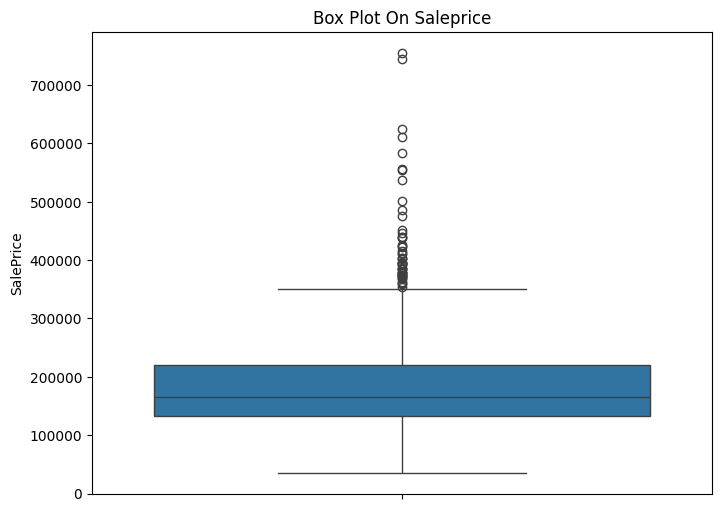

In [ ]:
fig, axes = subplots(nrows=1,ncols=1)
fig.set_size_inches(8, 6)
boxplot(data=df_train,y="SalePrice",orient="v",ax=axes)

axes.set(ylabel='SalePrice',title="Box Plot On Saleprice")
show()

### **The Box (Interquartile Range - IQR)**:

##### The blue box represents the middle 50% of the sale prices.
##### The bottom edge of the box indicates the first quartile (Q1), meaning 25% of the houses sold for a price below approximately $130,000.
##### The top edge of the box indicates the third quartile (Q3), meaning 75% of the houses sold for a price below approximately $220,000.
##### The line inside the box represents the median (Q2), which is the middle sale price. In this case, the median sale price is around $160,000.
##### The Whiskers: The lines extending from the top and bottom of the box are called whiskers. They typically extend to 1.5 times the IQR from the quartiles.

##### The lower whisker extends down to the lowest data point that is not considered an outlier, which is around $35,000.
##### The upper whisker extends up to the highest data point that is not considered an outlier, which is around $350,000.
##### **Outliers**: The circles above the upper whisker represent outliers. These are sale prices that are significantly higher than the rest of the data. There are a noticeable number of houses with sale prices ranging from approximately $350,000 to over $700,000, which are considered outliers based on the distribution of the majority of the sale prices.


##### The majority of houses in dataset sold for prices between approximately $130,000 and $220,000.
##### The median sale price is around $160,000.
##### There is a considerable range of sale prices, from a low of around $35,000 to a high exceeding $700,000.
##### There are a significant number of high-priced outliers, indicating some very expensive properties in the dataset that are not typical of the majority of sales.
##### The distribution of sale prices appears to be right-skewed, as the median is closer to the first quartile than the third, and there are many high-value outliers pulling the upper tail of the distribution.

--------------------------------
-------------------------------
------------------------------

## **Analysis**

-----------------------

In [ ]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,192.915888,61.000000,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,TA,TA,Y,298.000000,82.307692,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,192.915888,42.000000,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,TA,Y,192.915888,35.000000,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,TA,TA,Y,192.000000,84.000000,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,192.915888,40.000000,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,349.000000,82.307692,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,192.915888,60.000000,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,366.000000,82.307692,4,2010,WD,Normal,142125


- ##### **Distribution of Sale Price**

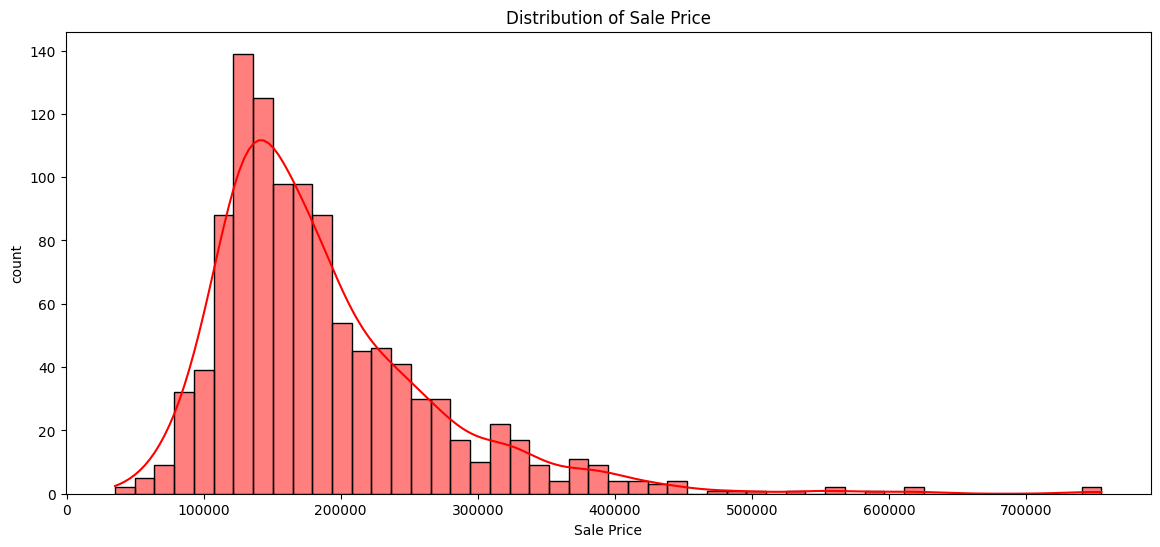


Skewness of Price: 1.93
Kurtosis of Price: 6.42


In [ ]:
figure(figsize=(14, 6))
histplot(df_train['SalePrice'], bins=50, kde=True, color='red') 
title('Distribution of Sale Price')
xlabel('Sale Price')
ylabel('count')
show()

print(f"\nSkewness of Price: {df_train['SalePrice'].skew():.2f}")
print(f"Kurtosis of Price: {df_train['SalePrice'].kurt():.2f}")

- ##### **Shape of the Distribution**: The distribution of 'Sale Price' is right-skewed (positively skewed). This means that the tail of the distribution extends further to the right, indicating that there are more data points with lower sale prices and fewer data points with very high sale prices.

- ##### **Peak Concentration**: The highest frequency (count) of sales occurs in the price range of approximately $120,000 to $160,000. This is where the red KDE curve peaks and the tallest bars of the histogram are located. This suggests that the majority of sales fall within this relatively affordable range.

- ##### **Gradual Decline**: After the peak, the frequency of sales gradually decreases as the sale price increases. The bars become shorter, and the KDE curve slopes downwards.

- ##### **Presence of Higher-Priced Sales (Outliers/Tail)**: While the majority of sales are in the lower to mid-range, there's a long tail extending towards higher sale prices (up to around $700,000 and beyond). This indicates that there are some properties sold at much higher prices, but they are less frequent.

- ##### **No Sales Below a Certain Price**: The distribution starts from a price greater than 0, suggesting that there are no sales recorded at extremely low or zero prices.

#### **The 'Sale Price' distribution is characterized by a high concentration of properties sold at lower to moderate prices, with a diminishing number of sales as prices increase. The right-skewness highlights the presence of a few high-value properties that extend the tail of the distribution.**

-----------------------------

- ##### **Relationship between Sale Price and Area**

In [ ]:
df_train['LotArea'].describe()

count      1094.000000
mean      10132.346435
std        8212.249621
min        1300.000000
25%        7606.750000
50%        9444.500000
75%       11387.250000
max      215245.000000
Name: LotArea, dtype: float64

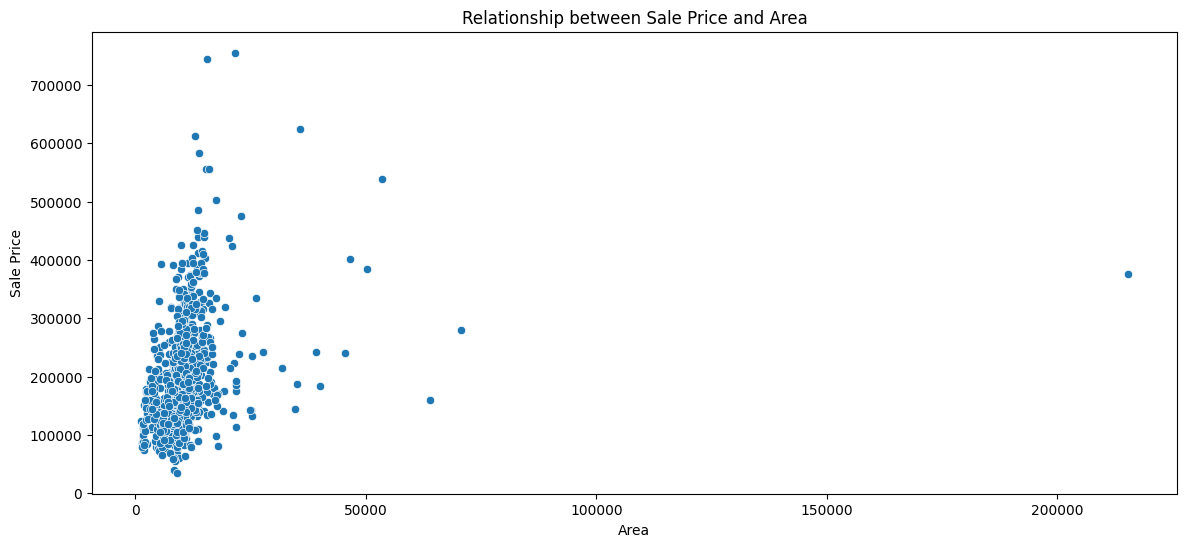

In [ ]:
figure(figsize=(14, 6))
scatterplot(x='LotArea', y='SalePrice', data=df_train)
title('Relationship between Sale Price and Area')
xlabel('Area')
ylabel('Sale Price')
show()

- ##### **Positive Relationship:** There appears to be a general positive relationship between 'Area' and 'Sale Price'. As the 'Area' increases, the 'Sale Price' generally tends to increase as well.

- ##### **Concentration of Data:** A large cluster of data points is concentrated in the lower-left portion of the plot, indicating that most properties have smaller areas and lower sale prices.

- ##### **Increasing Spread with Area:** As the 'Area' increases, the spread of 'Sale Price' also seems to increase. This means that for larger areas, there's a wider range of possible sale prices, suggesting other factors might heavily influence the price of very large properties.

- ##### **Outliers/High-Value Properties:** There are several data points that deviate from the main cluster, particularly at higher 'Area' and 'Sale Price' values. There's one prominent outlier with a very large 'Area' but a comparatively lower 'Sale Price' than what the trend might suggest for that size, and another with a very high 'Sale Price' for its 'Area'. These could be unusual properties or data entry errors.

#### **This scatterplot suggests that 'Area' is a significant factor in determining 'Sale Price', with larger areas generally commanding higher prices. However, the increasing scatter at higher areas implies that for very large properties, other characteristics besides just size become increasingly influential in their pricing. The outliers indicate instances that don't fit the general trend and might warrant further investigation.**

-------------------------------

<Figure size 1400x400 with 0 Axes>

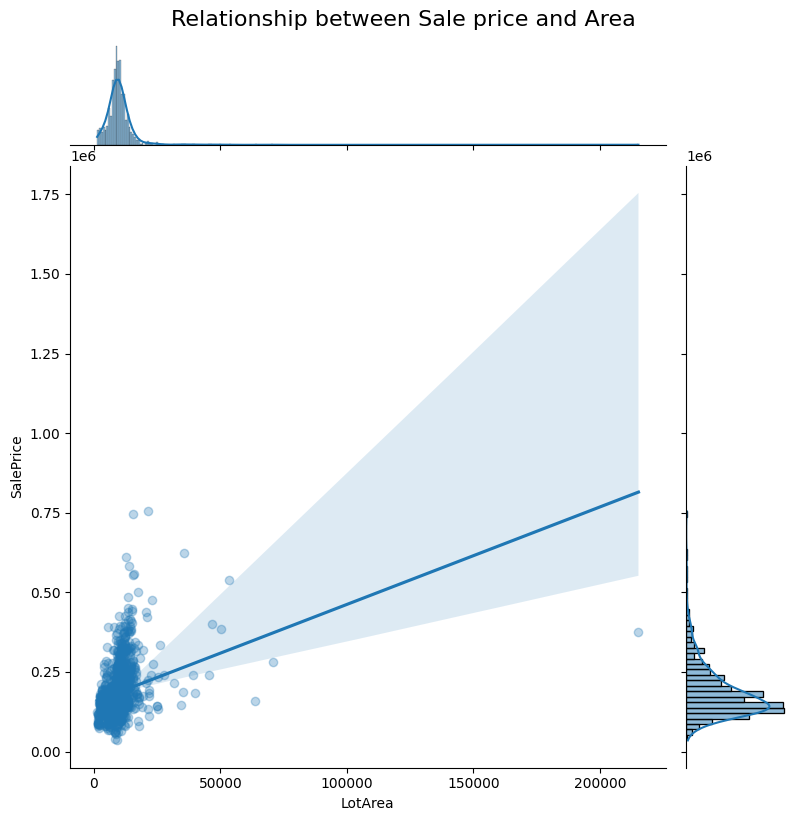

In [ ]:
figure(figsize=(14, 4))
jointplot(x='LotArea', y='SalePrice', data=df_train, kind='reg', height=8, scatter_kws={'alpha':0.3})
suptitle('Relationship between Sale price and Area', y=1.02, fontsize=16)
show()

#### **Main Scatter Plot (LotArea vs. SalePrice):**
- ##### **Positive Linear Trend**: There is a clear positive linear relationship between **LotArea** and **SalePrice**. As the **LotArea** increases, the **SalePrice** generally tends to increase as well. The blue regression line confirms this upward trend.

- ##### **Concentration of Data**: A very large cluster of data points is concentrated in the lower-left portion of the plot, indicating that most properties have smaller lot areas and lower sale prices (e.g., **LotArea** below 50,000).

- ##### **Increasing Variability with Area**: As the **LotArea** increases, the scatter of data points around the regression line appears to increase significantly. This means that for larger lot areas, there's a much wider range of possible sale prices. The shaded confidence interval around the regression line also widens considerably for larger **LotArea** values, reinforcing this observation.

- ##### **Outliers/High-Value Properties**: There are several data points that lie far from the main cluster and the regression line, particularly at higher **LotArea** values. These represent properties with unusually high or low sale prices for their size.

#### **Marginal Distribution of '**LotArea**' (Top Histogram/KDE):**

- ##### Highly Right-Skewed: The distribution of **LotArea** is extremely right-skewed. The vast majority of properties have smaller lot areas, and there's a long tail extending to a few properties with very large lot areas. The KDE shows a sharp peak at the lower end.

#### **Marginal Distribution of '**SalePrice**' (Right Histogram/KDE):**

- ##### **Right-Skewed:** The distribution of **SalePrice** is also right-skewed, though perhaps less extremely than **LotArea**. Most properties have lower sale prices, with a tail extending to higher-priced properties. The KDE shows a peak at the lower price range.

-----------------------

- #### **Relationship between year built and sale price**

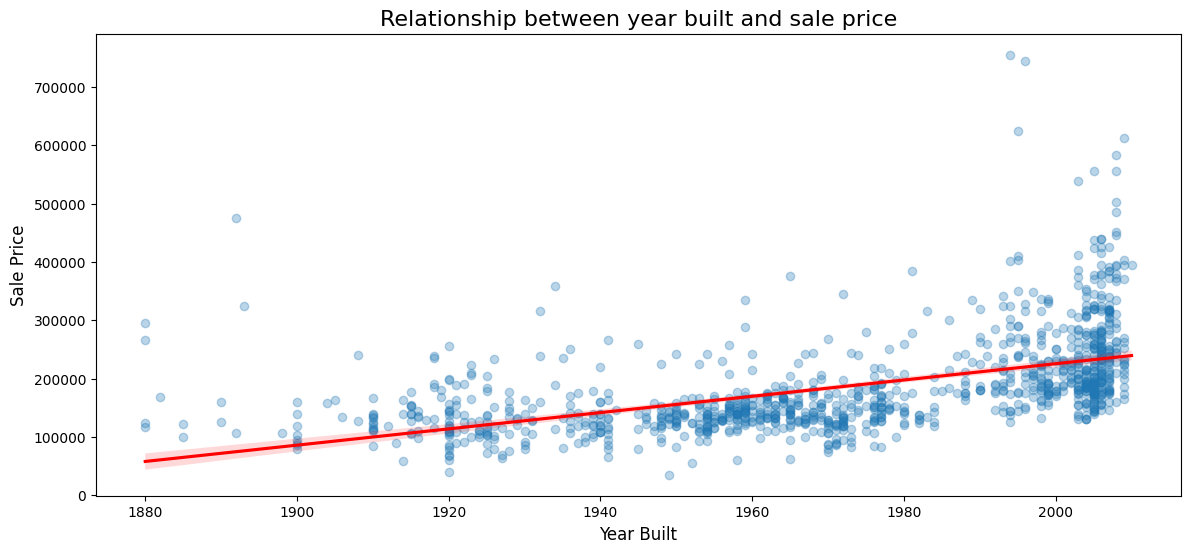

In [ ]:
figure(figsize=(14, 6))
regplot(x='YearBuilt', y='SalePrice', data=df_train, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
title('Relationship between year built and sale price', fontsize=16)
xlabel('Year Built', fontsize=12)
ylabel('Sale Price', fontsize=12)
show()

- ##### **Positive Linear Trend**: There is a clear positive linear relationship between 'Year Built' and 'Sale Price'. As the 'Year Built' increases (i.e., properties are newer), the 'Sale Price' generally tends to increase. The red regression line confirms this upward trend.

- ##### **Increasing Variability with Time**: While the trend is positive, the scatter of data points around the regression line appears to increase as the 'Year Built' becomes more recent. This means that for older properties (e.g., before 1950), the prices are more tightly clustered around the trend line. For newer properties (e.g., after 1980), there's a much wider range of sale prices for a given year built, indicating greater variability.

- ##### **Density of Data**: Most of the data points are concentrated in the later years (from around 1960 onwards), especially after 1980 and into the 2000s. This suggests that the dataset contains more information about newer properties.

- ##### **Outliers/High-Value Properties**: There are several properties with very high 'Sale Price' for their 'Year Built', particularly in the more recent years. These points lie significantly above the regression line.

- ##### **Confidence Interval**: The pink shaded area around the regression line represents the confidence interval. It shows the range within which the true regression line is likely to fall. The widening of this band in more recent years further emphasizes the increased variability in sale prices for newer properties.

------------------------------

- #### **Distribution of number of rooms**

C:\Users\RPC\AppData\Local\Temp\ipykernel_14640\2908941410.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot(x='TotRmsAbvGrd', data=df_train, palette='viridis')


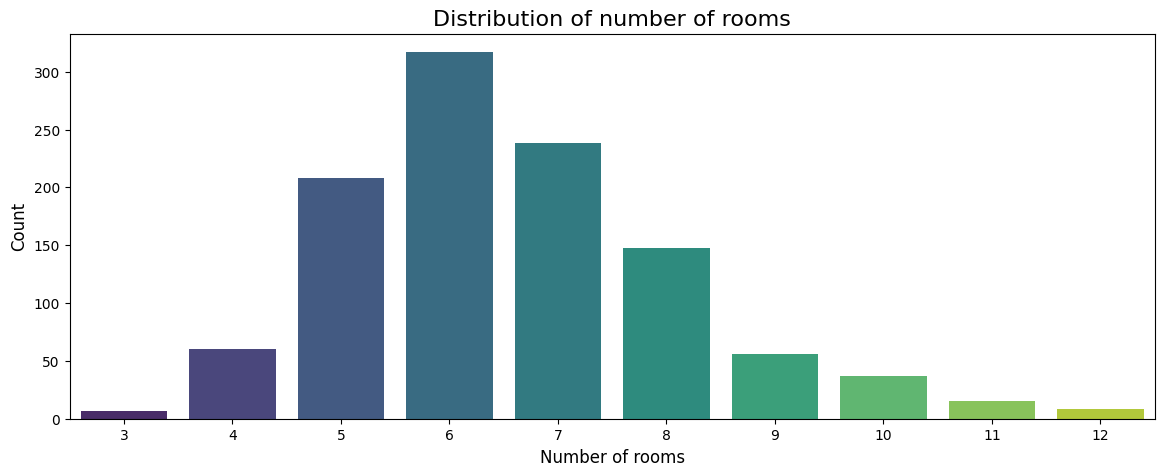

In [ ]:
figure(figsize=(14, 5))
countplot(x='TotRmsAbvGrd', data=df_train, palette='viridis')
title('Distribution of number of rooms', fontsize=16)
xlabel('Number of rooms', fontsize=12)
ylabel('Count', fontsize=12)
show()

- ##### **Most Common Room Count**: The most frequent number of rooms is 6, with a count exceeding 300 properties. This indicates that properties with 6 rooms are the most common in this dataset.

- ##### **Bell-Shaped Tendency (with skew)**: The distribution generally shows a peak around 6 rooms and then tapers off on both sides. However, it's slightly left-skewed (or negatively skewed), meaning the tail extends more towards fewer rooms, although the drop-off is quite sharp for very low room counts.

#### **Common Ranges**:

- ##### Properties with 5, 6, 7, and 8 rooms are quite common, with counts of over 100 each.

- ##### Properties with 3, 4, 9, 10, 11, and 12 rooms are significantly less common.

- ##### **Rarity of Extremes**: Very low room counts (e.g., 3 rooms) and very high room counts (e.g., 11 or 12 rooms) are rare in this dataset.

-----------------------------

- #### **Density between number of rooms and sale price**

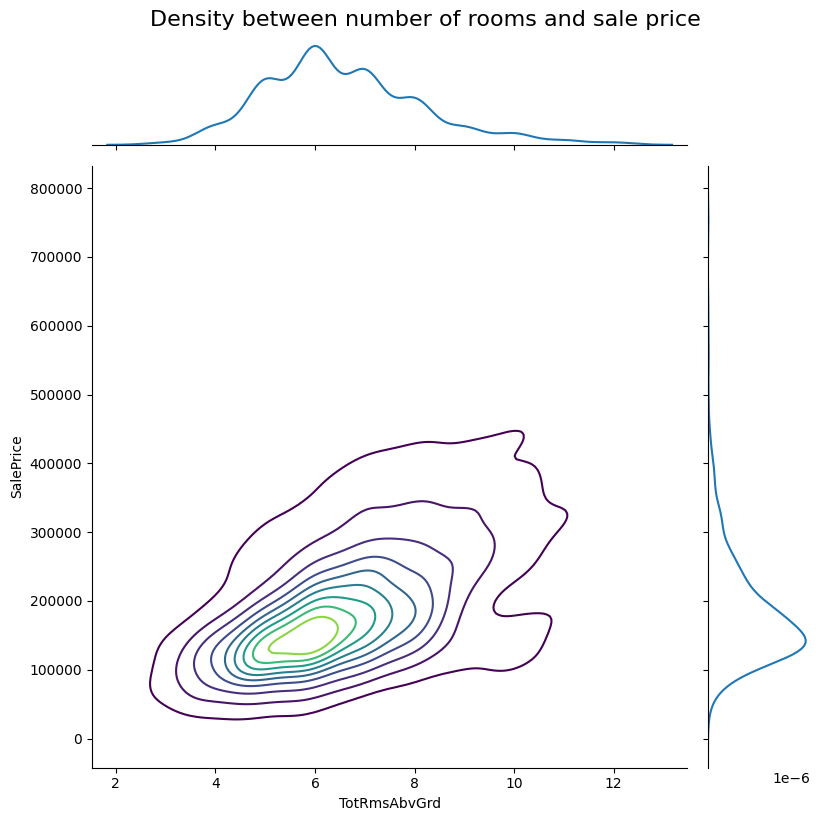

In [ ]:
jointplot(x='TotRmsAbvGrd', y='SalePrice', data=df_train, kind='kde', height=8, cmap='viridis')
suptitle('Density between number of rooms and sale price', y=1.02, fontsize=16)
show()

#### **Main Contour Plot (**TotRmsAbvGrd** vs. **SalePrice**):**

- ##### **Positive Association:** There is a general positive association between the number of rooms and sale price. As the number of rooms increases, the typical sale price also tends to increase.

- ##### **Highest Density Area:** The densest area (indicated by the innermost, typically lighter-colored contours) is concentrated around 5-7 rooms and a '**SalePrice**' of approximately $100,000 to $200,000. This suggests that properties with this number of rooms and within this price range are the most common.

#### **Spread and Shape**:

- ##### The contours show that for a given number of rooms, there's a range of sale prices, and for a given sale price, there's a range of room counts.

- ##### The contours extend towards higher room counts and higher sale prices, indicating that properties with more rooms tend to have higher prices, though the density decreases significantly at the extremes.

- ##### The shape of the contours suggests that while there's a general upward trend, the relationship isn't perfectly linear and might have some curvature or varying density.

#### **Marginal Distribution of '**TotRmsAbvGrd**' (Top KDE Plot)**:

- ##### **Unimodal and Skewed**: The distribution of '**TotRmsAbvGrd**' is unimodal, peaking around 6 rooms. It appears to be slightly right-skewed, with a longer tail extending towards higher room counts. This confirms that 6 rooms is the most common, and properties with many rooms are less frequent.

#### **Marginal Distribution of '**SalePrice**' (Right KDE Plot):**

- ##### **Right-Skewed:** The distribution of '**SalePrice**' is clearly right-skewed, with a sharp peak at lower prices and a long tail extending towards higher prices. This indicates that most properties are sold at lower prices, with fewer properties at very high prices.

-------------------------

- #### **Distribution of house style**

C:\Users\RPC\AppData\Local\Temp\ipykernel_14640\4095110779.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot(x='HouseStyle', data=df_train, palette='viridis')


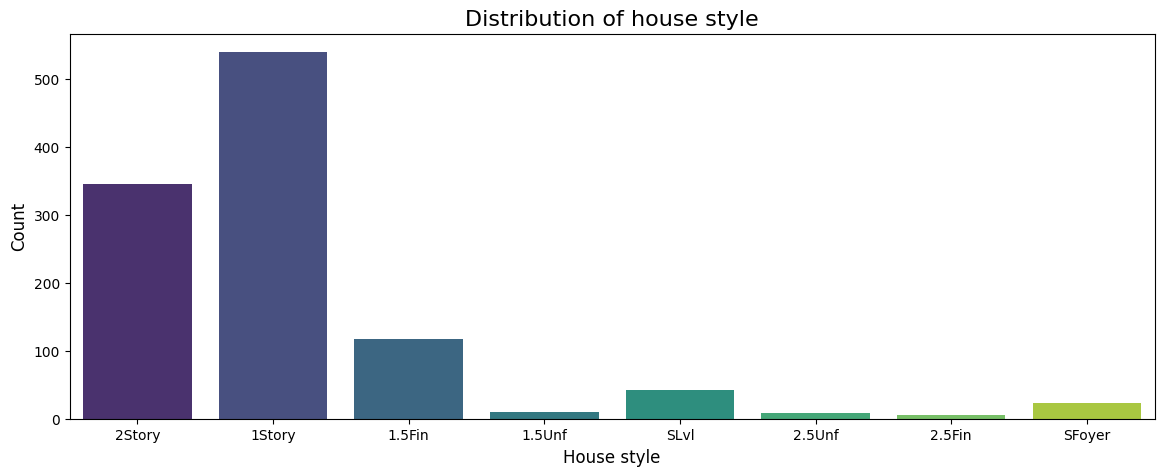

In [ ]:
figure(figsize=(14, 5))
countplot(x='HouseStyle', data=df_train, palette='viridis')
title('Distribution of house style', fontsize=16)
xlabel('House style', fontsize=12)
ylabel('Count', fontsize=12)
show()

#### **Dominant House Styles:**

- ##### **'1Story'** is by far the most common house style, with a count exceeding 500 properties.

- ##### **'2Story'** is the second most common, with a count around 350 properties.

#### **Moderately Common Style:**

- ##### **'1.5Fin'** (1.5 story finished) is present in a moderate number, around 100 properties.

#### **Rare Styles**: All other house styles are significantly less common, with counts well below 50. These include:

- ##### **'1.5Unf'** (1.5 story unfinished)

- ##### **'SLvl'** (Split Level)

- ##### **'2.5Unf'** (2.5 story unfinished)

- ##### **'2.5Fin'** (2.5 story finished)

- ##### **'SFoyer'** (Split Foyer)

#### **Imbalanced Distribution**: The distribution of house styles is highly imbalanced, with '1Story' and '2Story' making up the vast majority of the dataset.

------------------------

- #### **Number of type of building**

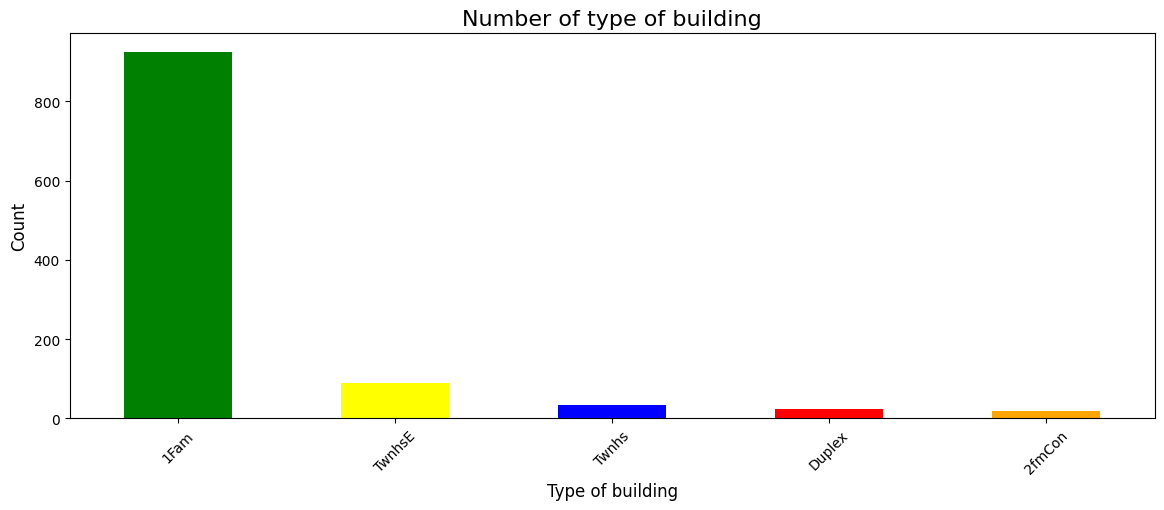

In [ ]:
figure(figsize=(14, 5))
df_train['BldgType'].value_counts().plot(kind='bar', color=['green','yellow','blue','red','orange'])
title('Number of type of building', fontsize=16)
xlabel('Type of building', fontsize=12)
ylabel('Count', fontsize=12)
xticks(rotation=45)
show()

- ##### **Dominant Building Type**: The most common type of building is '1Fam' (likely representing single-family homes), with a count significantly exceeding 800. This type overwhelmingly dominates the dataset.

#### **Minority Building Types**: All other building types are present in much smaller numbers.

- ##### 'TwnhsE' (Townhouse End unit) has the second-highest count, but it's still very low compared to '1Fam', around 100.

- ##### 'Twnhs' (Townhouse Interior unit), 'Duplex', and '2fmCon' (Two-family Conversion) have very low counts, all appearing to be less than 50.

- ##### **Imbalanced Distribution**: The distribution of building types is highly imbalanced, with '1Fam' properties representing the vast majority of the dataset.

-------------------------

- #### **Type of building by Sale price**

C:\Users\RPC\AppData\Local\Temp\ipykernel_14640\3996280468.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violinplot(x='BldgType', y='SalePrice', data=df_train, palette=['green','yellow','blue','red','orange'])


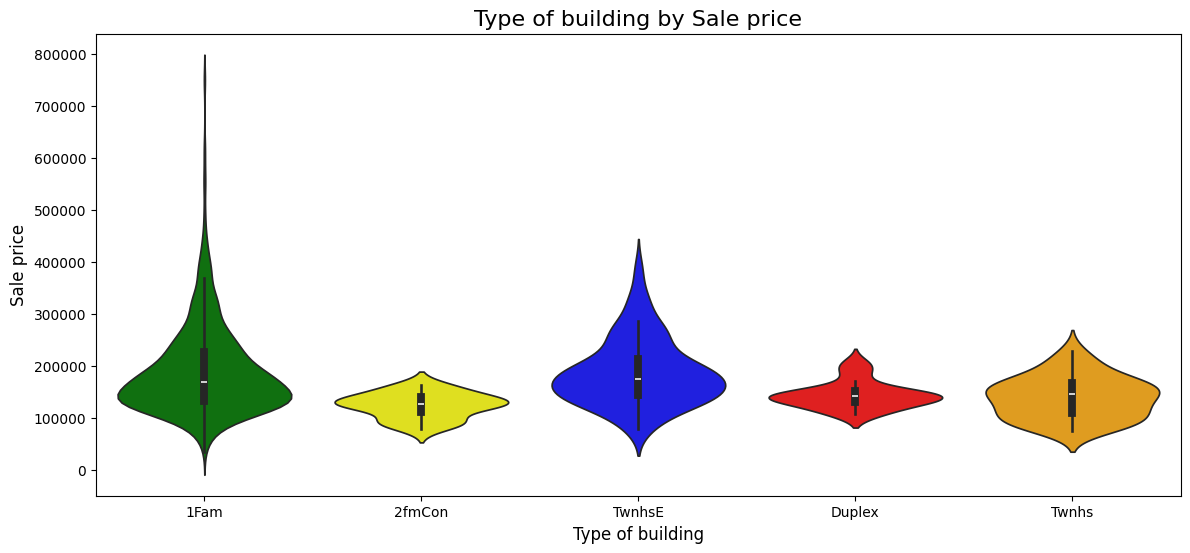

In [ ]:
figure(figsize=(14, 6))
violinplot(x='BldgType', y='SalePrice', data=df_train, palette=['green','yellow','blue','red','orange'])
title('Type of building by Sale price', fontsize=16)
xlabel('Type of building', fontsize=12)
ylabel('Sale price', fontsize=12)
show()

#### **'1Fam' (Single-Family Homes)**:

- ##### **Widest Distribution**: This violin is the widest and tallest, indicating that '1Fam' properties are the most numerous in the dataset and have the broadest range of sale prices.

- ##### **Median & IQR**: The median sale price for '1Fam' appears to be around $150,000 - $200,000. The box inside shows a significant interquartile range, meaning there's a wide spread in the middle 50% of prices.

- ##### **Skewness**: The distribution is clearly right-skewed, with a longer tail extending towards higher sale prices. This means while most single-family homes are in the lower-to-mid price range, there are quite a few with much higher prices.

- ##### **Density**: The highest density is concentrated in the lower price ranges.

#### **'TwnhsE' (Townhouse End Unit)**:

- ##### **Higher Median**: The median sale price for 'TwnhsE' appears to be higher than '1Fam', possibly around $200,000 - $250,000.

- ##### **Moderate Spread**: The distribution is narrower than '1Fam', indicating less variability in prices.

- ##### **Shape**: It shows a somewhat symmetrical distribution around its median, with a slight right skew.

#### **'Twnhs' (Townhouse Interior Unit)**:

- ##### **Lower Median**: The median sale price for 'Twnhs' appears to be lower than 'TwnhsE', possibly around $150,000.

- ##### **Narrow Distribution**: This violin is quite narrow, suggesting a more concentrated range of sale prices.

- ##### **Shape**: It appears to be relatively symmetrical.

#### **'2fmCon' (Two-Family Conversion) and 'Duplex':**

- ##### **Similar Medians**: Both '2fmCon' and 'Duplex' have similar median sale prices, which appear to be in the lower-to-mid range, possibly around $120,000 - $150,000.

- ##### **Narrowest Distributions**: These violins are among the narrowest, indicating less variability and a more concentrated set of sale prices.

- ##### **Density**: The density is concentrated around their respective medians.

--------------------------

- ##### **Avg of sale price by year built**

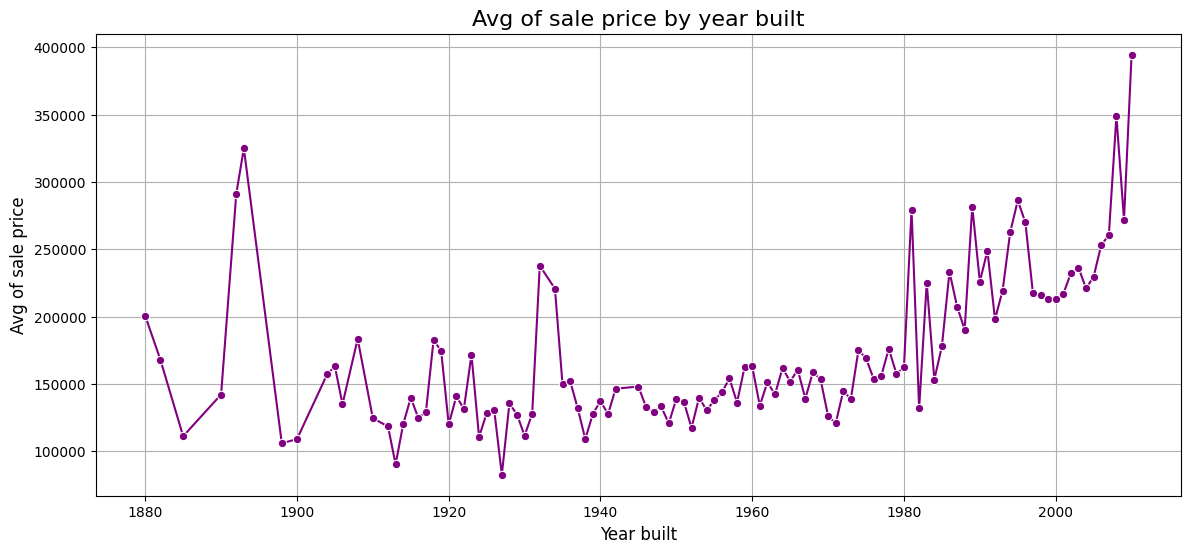

In [ ]:
avg_price_by_year = df_train.groupby('YearBuilt')['SalePrice'].mean()

figure(figsize=(14, 6))
lineplot(x=avg_price_by_year.index, y=avg_price_by_year.values, marker='o', color='purple')
title('Avg of sale price by year built', fontsize=16)
xlabel('Year built', fontsize=12)
ylabel('Avg of sale price', fontsize=12)
grid(True)
show()

- ##### **General Upward Trend:** There's a general, albeit fluctuating, upward trend in the average sale price as the 'Year built' becomes more recent. Newer properties tend to have higher average sale prices.

- ##### **Significant Fluctuations:** The plot shows considerable year-to-year fluctuations, especially in earlier periods and more recently. This suggests that while there's a long-term trend, the average price for properties built in a specific year can vary quite a bit.

- ##### **Early Peaks and Dips (Pre-1940s):**

- ##### There's a notable peak around 1895-1896, where the average sale price reaches over $300,000, which is quite high for that era. This is followed by a sharp dip.

- ##### Another smaller peak occurs around the early 1930s.

- ##### **Relatively Stable Period (1940s-1970s)**: The average sale price appears relatively more stable, albeit with minor fluctuations, in the mid-20th century.

- ##### **Increased Volatility and Rise (Post-1980s)**:

- ##### From the 1980s onwards, the average sale price shows a more pronounced and generally steeper increase.

- ##### There's a significant jump in average prices in the late 1990s and especially in the 2000s, with a sharp rise towards the end of the data (around 2005-2006), where the average price approaches $400,000.

- ##### The volatility also seems to increase in these later years.

-----------------------

- #### **Distribution of log Sale Price**

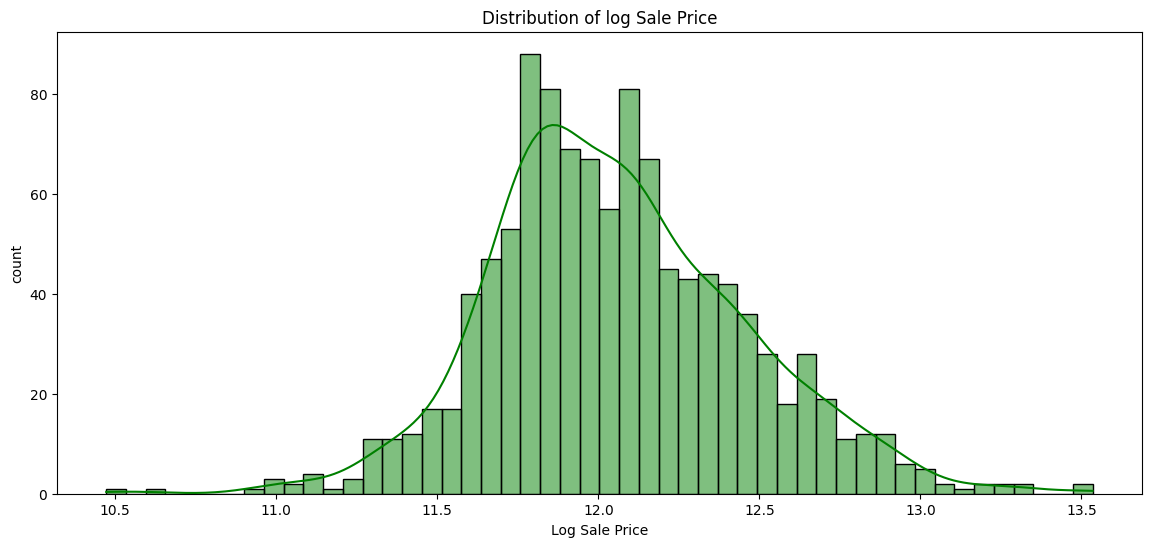


Skewness of Price: 0.30


In [ ]:
figure(figsize=(14, 6))

histplot(log(df_train['SalePrice']).replace(-inf,1e-6), bins=50, kde=True, color='green') 
title('Distribution of log Sale Price')
xlabel('Log Sale Price')
ylabel('count')
show()

print(f"\nSkewness of Price: {log(df_train['SalePrice']).replace(-inf,1e-6).skew():.2f}")

- ##### **Shape of the Distribution:** The distribution of the log-transformed 'Sale Price' is now much more symmetrical and bell-shaped, closely resembling a normal (Gaussian) distribution.

- ##### **Peak Concentration:** The highest frequency (count) of log-transformed sales occurs in the range of approximately 11.8 to 12.0. This is where the green KDE curve peaks and the tallest bars of the histogram are located. This suggests that after transformation, the most common 'Sale Price' (in log terms) falls within this range.

- ##### **Spread**: The values range from approximately 10.5 to 13.5. The distribution tapers off relatively evenly on both sides of the peak.

- ##### **Impact of Log Transformation**: Compared to the original 'Sale Price' distribution (which was highly right-skewed), this log-transformed version is much more amenable to statistical modeling techniques that assume normality or symmetry. The transformation has successfully reduced the skewness and made the data more spread out around a central tendency.



------------------------------------------

In [ ]:
df_train['log_SalePrice'] = log(df_train['SalePrice']).replace(-inf,1e-6)
df_train['log_SalePrice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: log_SalePrice, Length: 1094, dtype: float64

<Figure size 1200x800 with 0 Axes>

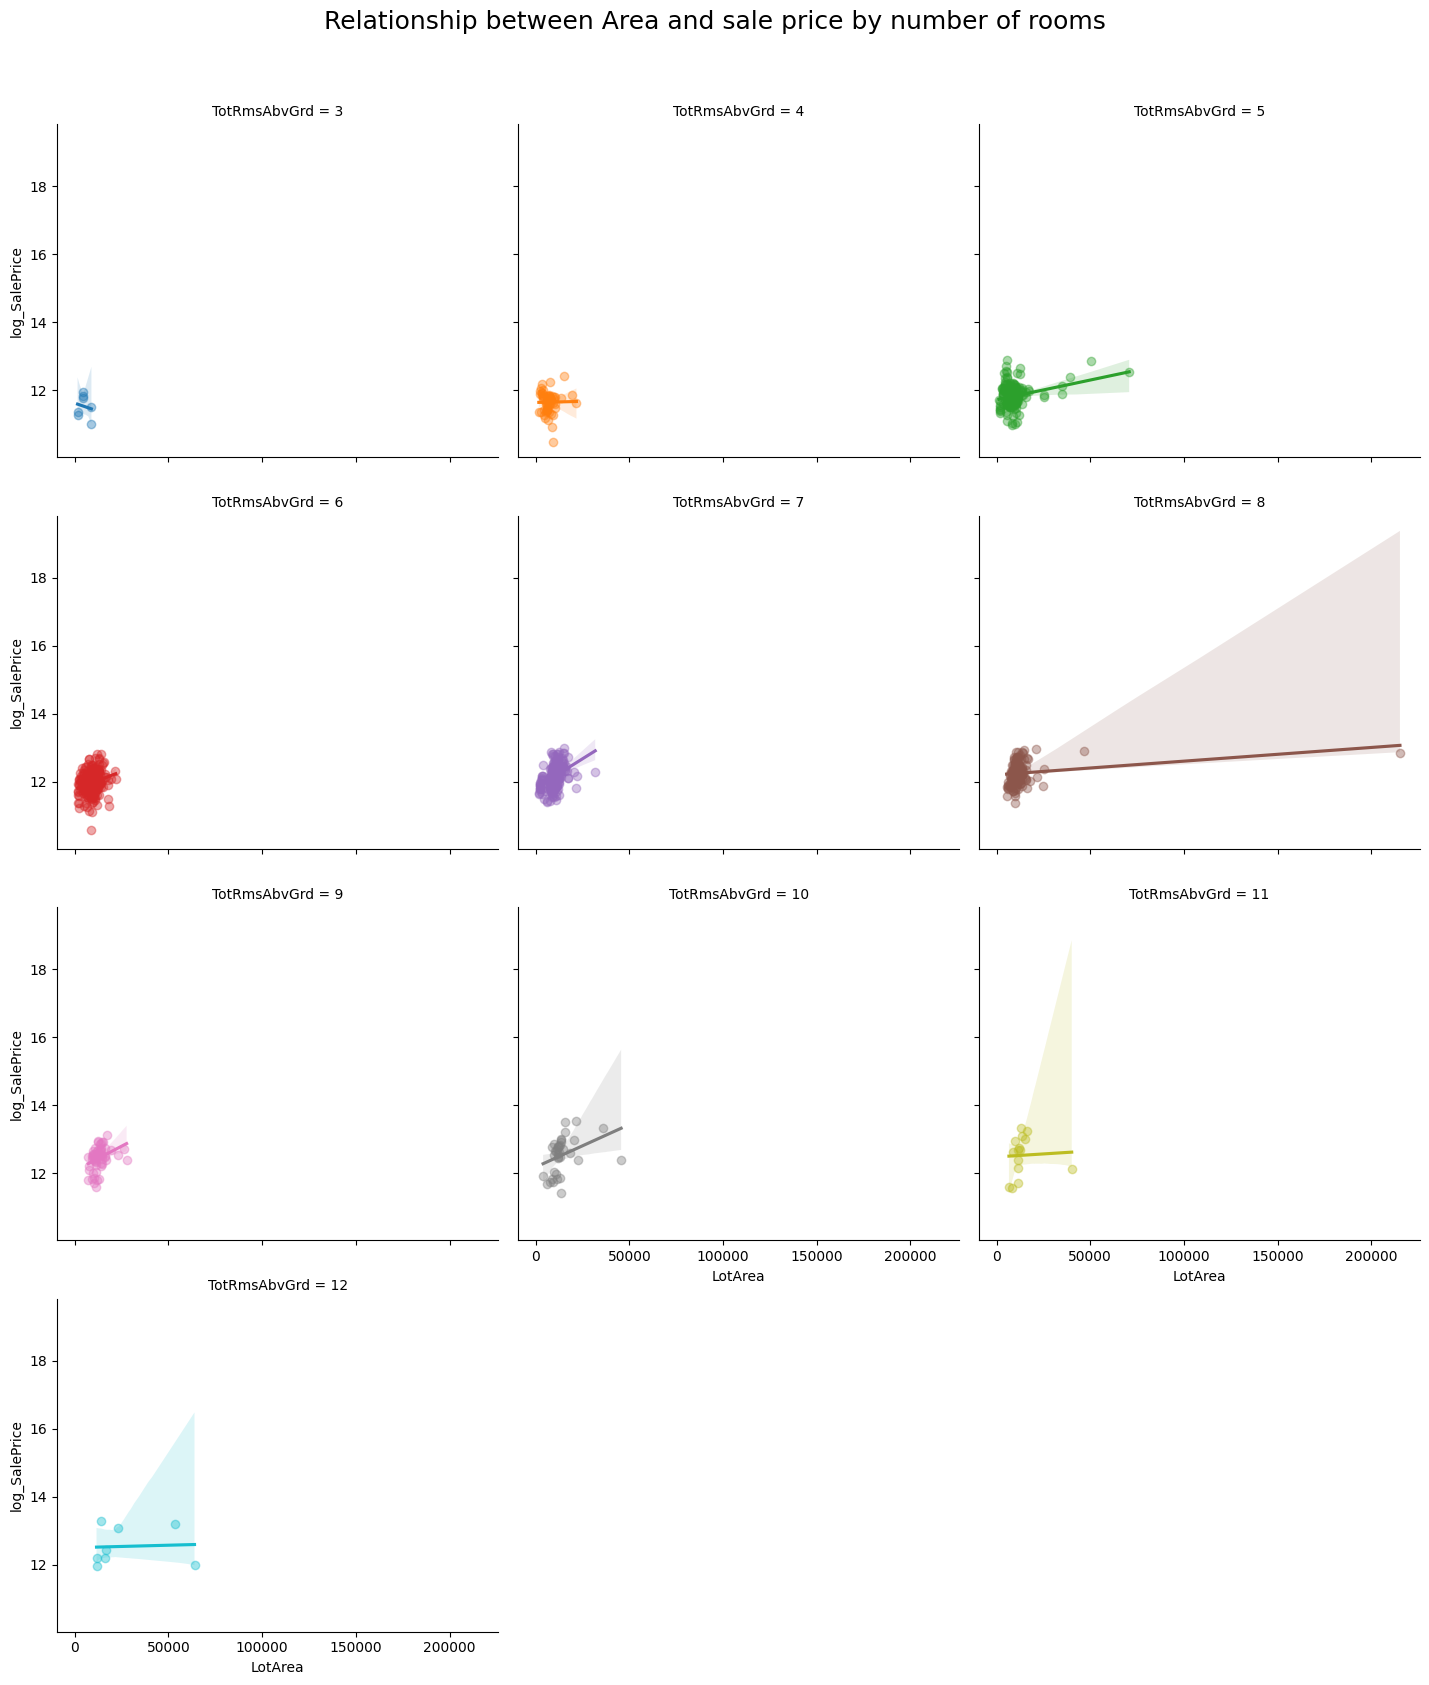

In [ ]:
figure(figsize=(12, 8))
lmplot(x='LotArea', y='log_SalePrice', hue='TotRmsAbvGrd', data=df_train,
            col='TotRmsAbvGrd', col_wrap=3, height=4, aspect=1.2, scatter_kws={'alpha':0.4})
suptitle('Relationship between Area and sale price by number of rooms', y=1.05, fontsize=18)
show()

- ##### **Overall Positive Trend**: For most numbers of rooms, there's a general positive linear relationship between LotArea and log_SalePrice. This means that, within each room category, larger lot areas tend to be associated with higher (log) sale prices.

- ##### **Varying Strength of Relationship**: The strength and clarity of this relationship vary significantly across different numbers of rooms.

- ##### **Data Density**: Many panels, especially for higher TotRmsAbvGrd values (e.g., 9, 10, 11, 12), have very few data points, making the regression lines and their confidence intervals less reliable. This reflects the distribution of TotRmsAbvGrd where 6, 7, and 8 rooms are most common.

#### **Observations by TotRmsAbvGrd:**

- ##### ** TotRmsAbvGrd = 3 (Top Left)**:

- ##### Shows a positive trend, but with considerable scatter.

- ##### The confidence interval is relatively wide, indicating uncertainty due to fewer data points or higher variability.

- ##### **TotRmsAbvGrd = 4 (Top Middle):**

- ##### Similar to 3 rooms, a positive trend is visible, but the data points are quite spread out.

- ##### The sample size appears small, leading to a wider confidence interval.

- ##### **TotRmsAbvGrd = 5 (Top Right)**:

- ##### A clearer positive trend emerges, with a denser cluster of points at lower LotArea values.

- ##### The relationship seems more defined than for 3 or 4 rooms.

**TotRmsAbvGrd = 6 (Middle Left):**

- ##### This panel has a very high density of data points, reflecting that 6 rooms is the most common.

- ##### A strong positive linear relationship is evident, with the regression line showing a clear upward slope. The confidence interval is relatively narrow in the denser areas.

- ##### **TotRmsAbvGrd = 7 (Middle Center)**:

- ##### Also shows a strong positive linear relationship, similar to 6 rooms, with a good density of data points.

**TotRmsAbvGrd = 8 (Middle Right):**

- ##### A positive trend is still present, but the density of points starts to decrease compared to 6 and 7 rooms.

- ##### The confidence interval widens, especially for larger LotArea.

- ##### **TotRmsAbvGrd = 9, 10, 11, 12 (Bottom Rows):**

- ##### These panels have very few data points, making it difficult to confidently infer a strong relationship.

- ##### While regression lines are drawn, their wide confidence intervals (often spanning a large vertical range) indicate high uncertainty.

- ##### The trends, if any, are highly influenced by the few available data points. For example, TotRmsAbvGrd = 12 shows a positive trend but with only a handful of points.

In [ ]:
df_train = df_train.drop('log_SalePrice',axis=1)

---------------------------------------------
---------------------------------------------
---------------------------------------------

## **Transform Data**

---------------------------

In [ ]:
train_obj = df_train.select_dtypes(include='object')
train_non_obj = df_train.select_dtypes(exclude='object')

In [ ]:
train_non_obj.shape

(1094, 28)

In [ ]:
train_obj.shape

(1094, 37)

In [ ]:
for col in train_obj.columns:
    print(f'{col} : {train_obj[col].nunique()}')

MSZoning : 5
Street : 2
LotShape : 4
LandContour : 4
Utilities : 1
LotConfig : 5
LandSlope : 3
Neighborhood : 25
Condition1 : 9
Condition2 : 6
BldgType : 5
HouseStyle : 8
RoofStyle : 5
RoofMatl : 7
Exterior1st : 14
Exterior2nd : 16
ExterQual : 4
ExterCond : 4
Foundation : 5
BsmtQual : 4
BsmtCond : 4
BsmtExposure : 4
BsmtFinType1 : 6
BsmtFinType2 : 6
Heating : 4
HeatingQC : 5
CentralAir : 2
Electrical : 5
KitchenQual : 4
Functional : 6
GarageType : 6
GarageFinish : 3
GarageQual : 5
GarageCond : 5
PavedDrive : 3
SaleType : 9
SaleCondition : 6


-----------------------------------
---------------------------------------------

In [ ]:
for col in train_obj.columns:
    nuniques = train_obj[col].nunique()
    if nuniques == 3  :
        print(f'{col} : {train_obj[col].nunique()}')

LandSlope : 3
GarageFinish : 3
PavedDrive : 3


---------------------------------------------

In [ ]:
# LandSlope: Slope of property
# Gtl (Gentle)  
# Mod (Moderate)  
# Sev (Severe)  

train_obj['LandSlope'].value_counts() # ordinal

LandSlope
Gtl    1045
Mod      44
Sev       5
Name: count, dtype: int64

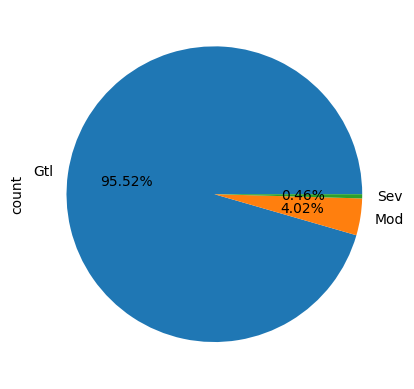

In [ ]:
train_obj['LandSlope'].value_counts().plot.pie(autopct='%0.2f%%')
show()

In [ ]:
train_obj['LandSlope']= train_obj['LandSlope'].replace('Gtl',1)
train_obj['LandSlope']= train_obj['LandSlope'].replace('Mod',2)
train_obj['LandSlope']= train_obj['LandSlope'].replace('Sev',3)

C:\Users\RPC\AppData\Local\Temp\ipykernel_14640\760400348.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_obj['LandSlope']= train_obj['LandSlope'].replace('Sev',3)


In [ ]:
train_obj['LandSlope'].value_counts()

LandSlope
1    1045
2      44
3       5
Name: count, dtype: int64

---------------------------------------------

In [ ]:
# GarageFinish: Interior finish of the garage
# Unf (Unfinished) 
# RFn (Rough Finished) 
# Fin (Finished) 

train_obj['GarageFinish'].value_counts() # ordinal

GarageFinish
Unf    485
RFn    333
Fin    276
Name: count, dtype: int64

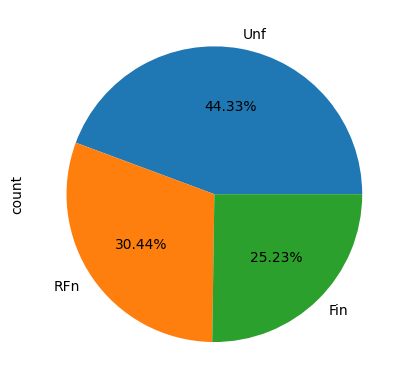

In [ ]:
train_obj['GarageFinish'].value_counts().plot.pie(autopct='%0.2f%%')
show()

In [ ]:
train_obj['GarageFinish']= train_obj['GarageFinish'].replace('Unf',1)
train_obj['GarageFinish']= train_obj['GarageFinish'].replace('RFn',2)
train_obj['GarageFinish']= train_obj['GarageFinish'].replace('Fin',3)

C:\Users\RPC\AppData\Local\Temp\ipykernel_14640\2205933198.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_obj['GarageFinish']= train_obj['GarageFinish'].replace('Fin',3)


In [ ]:
train_obj['GarageFinish'].value_counts()

GarageFinish
1    485
2    333
3    276
Name: count, dtype: int64

---------------------------------------------

In [ ]:
# PavedDrive: Paved driveway
# Y (Yes Paved)
# P (Partially Paved)
# N (Not Paved)
train_obj['PavedDrive'].value_counts() # ordinal

PavedDrive
Y    1023
N      48
P      23
Name: count, dtype: int64

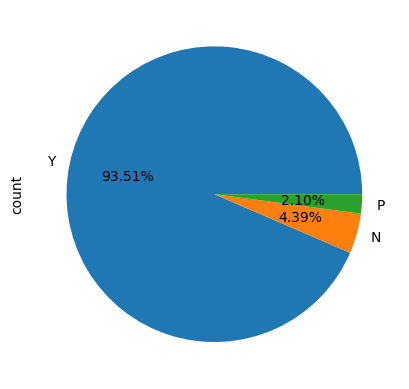

In [ ]:
train_obj['PavedDrive'].value_counts().plot.pie(autopct='%0.2f%%')
show()

In [ ]:
train_obj['PavedDrive']= train_obj['PavedDrive'].replace('Y',1)
train_obj['PavedDrive']= train_obj['PavedDrive'].replace('N',2)
train_obj['PavedDrive']= train_obj['PavedDrive'].replace('P',3)

C:\Users\RPC\AppData\Local\Temp\ipykernel_14640\1832947133.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_obj['PavedDrive']= train_obj['PavedDrive'].replace('P',3)


In [ ]:
train_obj['PavedDrive'].value_counts()

PavedDrive
1    1023
2      48
3      23
Name: count, dtype: int64

------------------------------------
---------------------------------------------

In [ ]:
for col in train_obj.columns:
    nuniques = train_obj[col].nunique()
    if nuniques == 4  :
        print(f'{col} : {train_obj[col].nunique()}')

LotShape : 4
LandContour : 4
ExterQual : 4
ExterCond : 4
BsmtQual : 4
BsmtCond : 4
BsmtExposure : 4
Heating : 4
KitchenQual : 4


---------------------------------------------

In [ ]:
# LotShape : General shape of property
# Reg (Regular) 
# IR1 (Slightly irregular) 
# IR2 (Moderately irregular) 
# IR3 (Irregular) 

train_obj['LotShape'].value_counts() # ordinal

LotShape
Reg    760
IR1    301
IR2     26
IR3      7
Name: count, dtype: int64

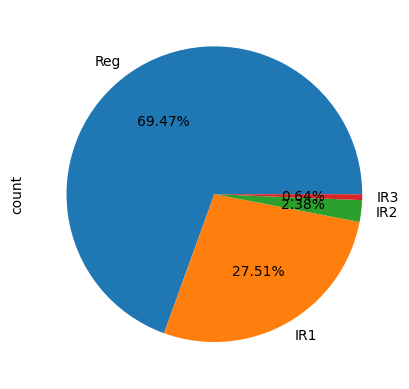

In [ ]:
train_obj['LotShape'].value_counts().plot.pie(autopct='%0.2f%%')
show()

In [ ]:
train_obj['LotShape']= train_obj['LotShape'].replace('Reg',1)
train_obj['LotShape']= train_obj['LotShape'].replace('IR1',2)
train_obj['LotShape']= train_obj['LotShape'].replace('IR2',3)
train_obj['LotShape']= train_obj['LotShape'].replace('IR3',4)

C:\Users\RPC\AppData\Local\Temp\ipykernel_14640\135414595.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_obj['LotShape']= train_obj['LotShape'].replace('IR3',4)


In [ ]:
train_obj['LotShape'].value_counts()

LotShape
1    760
2    301
3     26
4      7
Name: count, dtype: int64

---------------------------------------------

In [ ]:
# LandContour : Flatness of the property
# Lvl (Level) 
# Bnk (Banked – Slope from the street) 
# HLS (Hillside – Significant slope) 
# Low (Depression – Below street level) 

train_obj['LandContour'].value_counts() # ordinal

LandContour
Lvl    991
Bnk     45
HLS     44
Low     14
Name: count, dtype: int64

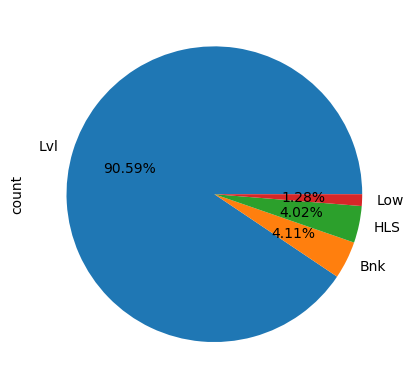

In [ ]:
train_obj['LandContour'].value_counts().plot.pie(autopct='%0.2f%%')
show()

In [ ]:
train_obj['LandContour']= train_obj['LandContour'].replace('Lvl',1)
train_obj['LandContour']= train_obj['LandContour'].replace('Bnk',2)
train_obj['LandContour']= train_obj['LandContour'].replace('HLS',3)
train_obj['LandContour']= train_obj['LandContour'].replace('Low',4)

C:\Users\RPC\AppData\Local\Temp\ipykernel_14640\116715744.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_obj['LandContour']= train_obj['LandContour'].replace('Low',4)


In [ ]:
train_obj['LandContour'].value_counts()

LandContour
1    991
2     45
3     44
4     14
Name: count, dtype: int64

---------------------------------------------

In [ ]:
# ExterQual: Exterior material quality
# Fa (Fair) 
# TA (Typical/Average) 
# Gd (Good)
# Ex (Excellent) 

train_obj['ExterQual'].value_counts() # ordinal

ExterQual
TA    646
Gd    395
Ex     46
Fa      7
Name: count, dtype: int64

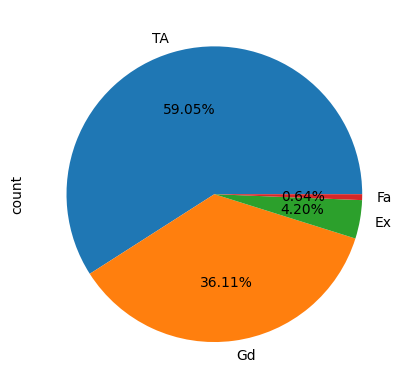

In [ ]:
train_obj['ExterQual'].value_counts().plot.pie(autopct='%0.2f%%')
show()

In [ ]:
train_obj['ExterQual']= train_obj['ExterQual'].replace('Fa',1)
train_obj['ExterQual']= train_obj['ExterQual'].replace('TA',2)
train_obj['ExterQual']= train_obj['ExterQual'].replace('Gd',3)
train_obj['ExterQual']= train_obj['ExterQual'].replace('Ex',4)

C:\Users\RPC\AppData\Local\Temp\ipykernel_14640\2392043622.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_obj['ExterQual']= train_obj['ExterQual'].replace('Ex',4)


In [ ]:
train_obj['ExterQual'].value_counts()

ExterQual
2    646
3    395
4     46
1      7
Name: count, dtype: int64

---------------------------------------------

In [ ]:
# ExterCond: Present condition of the material on the exterior
# Fa (Fair) 
# TA (Typical/Average) 
# Gd (Good)
# Ex (Excellent) 

train_obj['ExterCond'].value_counts() # ordinal

ExterCond
TA    973
Gd    104
Fa     15
Ex      2
Name: count, dtype: int64

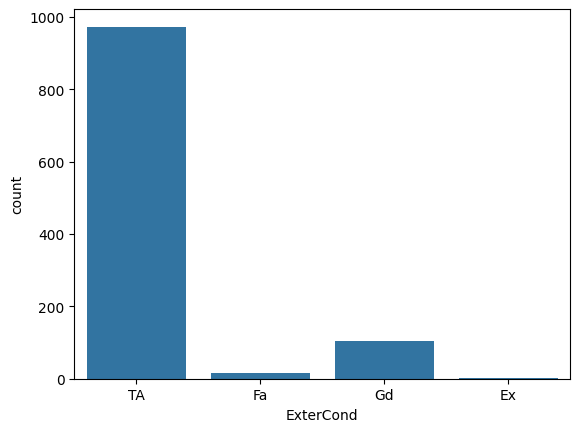

In [ ]:
countplot(x='ExterCond', data=df_train)
show()

In [ ]:
train_obj['ExterCond']= train_obj['ExterCond'].replace('Fa',1)
train_obj['ExterCond']= train_obj['ExterCond'].replace('TA',2)
train_obj['ExterCond']= train_obj['ExterCond'].replace('Gd',3)
train_obj['ExterCond']= train_obj['ExterCond'].replace('Ex',4)

C:\Users\RPC\AppData\Local\Temp\ipykernel_14640\222926086.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_obj['ExterCond']= train_obj['ExterCond'].replace('Ex',4)


In [ ]:
train_obj['ExterCond'].value_counts()

ExterCond
2    973
3    104
1     15
4      2
Name: count, dtype: int64

---------------------------------------------

In [ ]:
# BsmtCond : General condition of the basement
# Gd (Good)
# TA (Typical/Average) 
# Fa (Fair) 
# Po (Poor)  
train_obj['BsmtCond'].value_counts() # ordinal

BsmtCond
TA    1006
Gd      51
Fa      36
Po       1
Name: count, dtype: int64

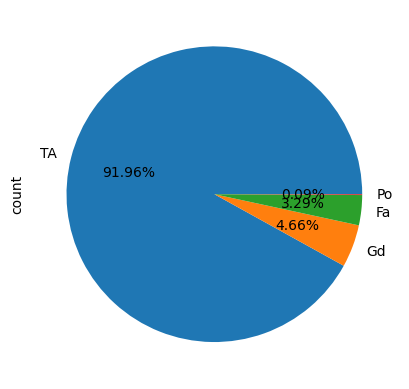

In [ ]:
train_obj['BsmtCond'].value_counts().plot.pie(autopct='%0.2f%%')
show()

In [ ]:
# for train data
train_obj['BsmtCond']= train_obj['BsmtCond'].replace('Gd',1)
train_obj['BsmtCond']= train_obj['BsmtCond'].replace('TA',2)
train_obj['BsmtCond']= train_obj['BsmtCond'].replace('Fa',3)
train_obj['BsmtCond']= train_obj['BsmtCond'].replace('Po',4)

C:\Users\RPC\AppData\Local\Temp\ipykernel_14640\1583934741.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_obj['BsmtCond']= train_obj['BsmtCond'].replace('Po',4)


In [ ]:
train_obj['BsmtCond'].value_counts()

BsmtCond
2    1006
1      51
3      36
4       1
Name: count, dtype: int64

---------------------------------------------

In [ ]:
# BsmtQual: Height of the basement
# Fa (Fair) 
# TA (Typical/Average) 
# Gd (Good)
# Ex (Excellent) 
train_obj['BsmtQual'].value_counts() # ordinal

BsmtQual
TA    486
Gd    463
Ex    113
Fa     32
Name: count, dtype: int64

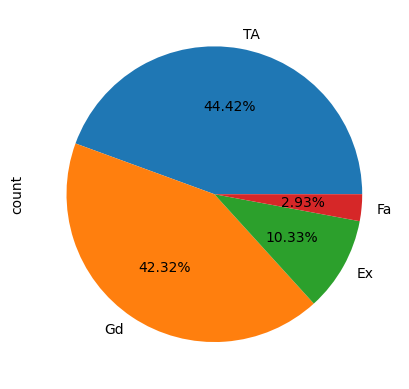

In [ ]:
train_obj['BsmtQual'].value_counts().plot.pie(autopct='%0.2f%%')
show()

In [ ]:
train_obj['BsmtQual']= train_obj['BsmtQual'].replace('Fa',1)
train_obj['BsmtQual']= train_obj['BsmtQual'].replace('TA',2)
train_obj['BsmtQual']= train_obj['BsmtQual'].replace('Gd',3)
train_obj['BsmtQual']= train_obj['BsmtQual'].replace('Ex',4)

C:\Users\RPC\AppData\Local\Temp\ipykernel_14640\1706262065.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_obj['BsmtQual']= train_obj['BsmtQual'].replace('Ex',4)


In [ ]:
train_obj['BsmtQual'].value_counts() 

BsmtQual
2    486
3    463
4    113
1     32
Name: count, dtype: int64

---------------------------------------------

In [ ]:
# BsmtExposure : Walkout or garden level basement walls
# No 
# Mn (Minimum)
# Av (Average)
# Gd (Good) 

train_obj['BsmtExposure'].value_counts() # ordinal

BsmtExposure
No    734
Av    174
Gd     97
Mn     89
Name: count, dtype: int64

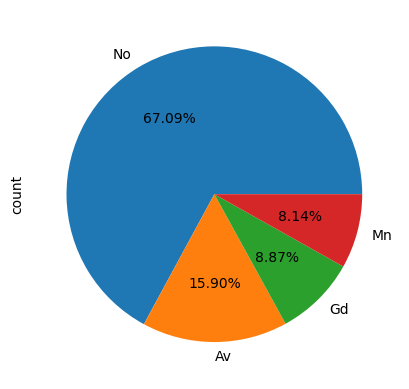

In [ ]:
train_obj['BsmtExposure'].value_counts().plot.pie(autopct='%0.2f%%')
show()

In [ ]:
train_obj['BsmtExposure']= train_obj['BsmtExposure'].replace('No',1)
train_obj['BsmtExposure']= train_obj['BsmtExposure'].replace('Mn',2)
train_obj['BsmtExposure']= train_obj['BsmtExposure'].replace('Av',3)
train_obj['BsmtExposure']= train_obj['BsmtExposure'].replace('Gd',4)

C:\Users\RPC\AppData\Local\Temp\ipykernel_14640\2435423177.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_obj['BsmtExposure']= train_obj['BsmtExposure'].replace('Gd',4)


In [ ]:
train_obj['BsmtExposure'].value_counts() 

BsmtExposure
1    734
3    174
4     97
2     89
Name: count, dtype: int64

---------------------------------------------

In [ ]:
# KitchenQual: Kitchen quality
# Fa (Fair) 
# TA (Typical/Average) 
# Gd (Good)
# Ex (Excellent)

train_obj['KitchenQual'].value_counts() # ordinal

KitchenQual
TA    528
Gd    454
Ex     91
Fa     21
Name: count, dtype: int64

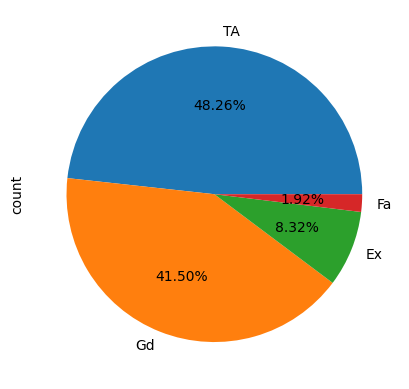

In [ ]:
train_obj['KitchenQual'].value_counts().plot.pie(autopct='%0.2f%%')
show()

In [ ]:
train_obj['KitchenQual']= train_obj['KitchenQual'].replace('Fa',1)
train_obj['KitchenQual']= train_obj['KitchenQual'].replace('TA',2)
train_obj['KitchenQual']= train_obj['KitchenQual'].replace('Gd',3)
train_obj['KitchenQual']= train_obj['KitchenQual'].replace('Ex',4)

C:\Users\RPC\AppData\Local\Temp\ipykernel_14640\3377911134.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_obj['KitchenQual']= train_obj['KitchenQual'].replace('Ex',4)


In [ ]:
train_obj['KitchenQual'].value_counts()

KitchenQual
2    528
3    454
4     91
1     21
Name: count, dtype: int64

---------------------------------------------

In [ ]:
# Heating: Type of heating
train_obj['Heating'].value_counts() # nominal

Heating
GasA    1075
GasW      16
Grav       2
OthW       1
Name: count, dtype: int64

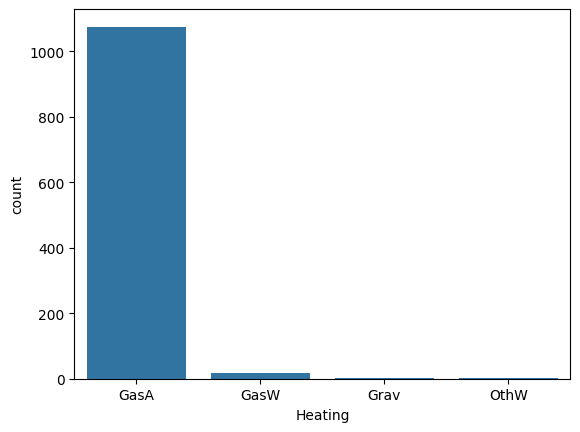

In [ ]:
countplot(x='Heating', data=df_train)
show()

------------------------------------
---------------------------------------------

In [ ]:
for col in train_obj.columns:
    nuniques = train_obj[col].nunique()
    if nuniques == 5  :
        print(f'{col} : {train_obj[col].nunique()}')

MSZoning : 5
LotConfig : 5
BldgType : 5
RoofStyle : 5
Foundation : 5
HeatingQC : 5
Electrical : 5
GarageQual : 5
GarageCond : 5


---------------------------------------------

In [ ]:
# MSZoning: The general zoning classification
# RL (Residential Low Density)
# RM (Residential Medium Density) 
# FV (Floating Village Residential) 
# RH (Residential High Density) 
# C (all) (Commercial) 

train_obj['MSZoning'].value_counts() # nominal

MSZoning
RL         850
RM         173
FV          54
RH           9
C (all)      8
Name: count, dtype: int64

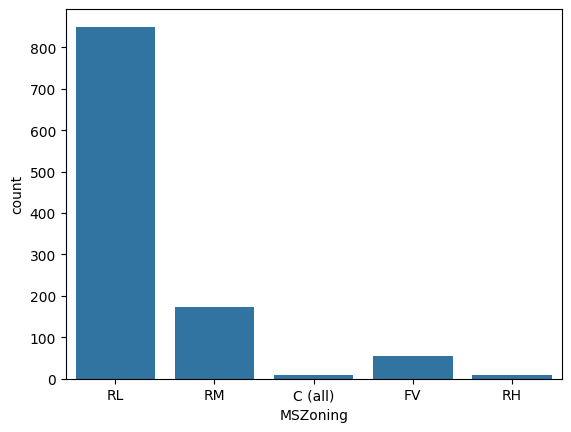

In [ ]:
countplot(x='MSZoning', data=df_train)
show()

---------------------------------------------

In [ ]:
# Foundation: Type of foundation 
# PConc (Poured Concrete) 
# CBlock (Cinder Block) 
# BrkTil (Brick & Tile) 
# Stone 
# Wood 

train_obj['Foundation'].value_counts() # nominal

Foundation
PConc     518
CBlock    446
BrkTil    122
Stone       6
Wood        2
Name: count, dtype: int64

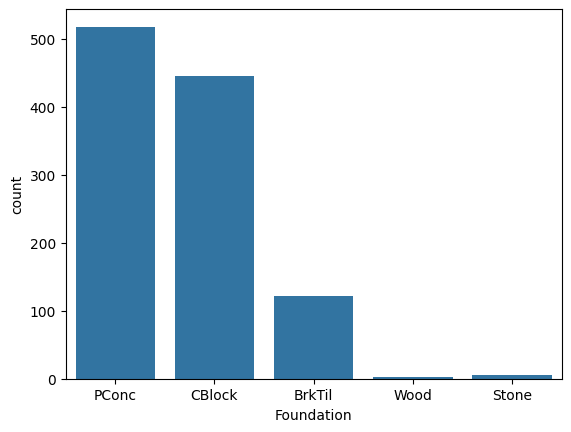

In [ ]:
countplot(x='Foundation', data=df_train)
show()

---------------------------------------------

In [ ]:
# LotConfig: Lot configuration
# Inside
# Corner 
# CulDSac (Cul-de-sac)
# FR2 (Frontage on 2 sides of property) 
# FR3 (Frontage on 3 sides of property) 

train_obj['LotConfig'].value_counts() # nominal

LotConfig
Inside     830
Corner     187
CulDSac     44
FR2         29
FR3          4
Name: count, dtype: int64

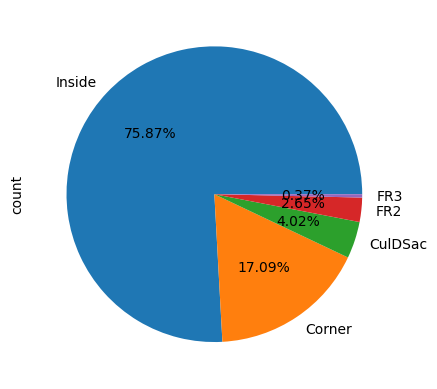

In [ ]:
train_obj['LotConfig'].value_counts().plot.pie(autopct='%0.2f%%')
show()

In [ ]:
train_obj['LotConfig']= train_obj['LotConfig'].replace('Inside',1)
train_obj['LotConfig']= train_obj['LotConfig'].replace('Corner',2)
train_obj['LotConfig']= train_obj['LotConfig'].replace('CulDSac',3)
train_obj['LotConfig']= train_obj['LotConfig'].replace('FR2',4)
train_obj['LotConfig']= train_obj['LotConfig'].replace('FR3',5)

C:\Users\RPC\AppData\Local\Temp\ipykernel_14640\3904735806.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_obj['LotConfig']= train_obj['LotConfig'].replace('FR3',5)


---------------------------------------------

In [ ]:
# BldgType: Type of dwelling
train_obj['BldgType'].value_counts() # nominal

BldgType
1Fam      925
TwnhsE     90
Twnhs      35
Duplex     24
2fmCon     20
Name: count, dtype: int64

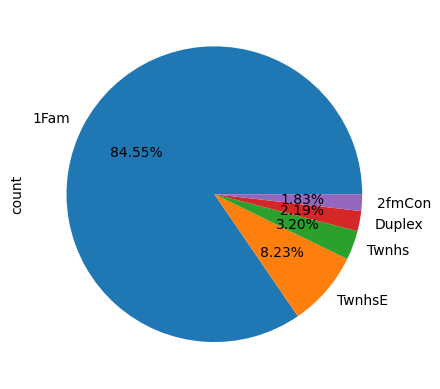

In [ ]:
train_obj['BldgType'].value_counts().plot.pie(autopct='%0.2f%%')
show()

---------------------------------------------

In [ ]:
# HeatingQC: Heating quality and condition
# Ex (Excellent) 
# Gd (Good) 
# TA (Typical/Average) 
# Fa (Fair) 
# Po (Poor) 

train_obj['HeatingQC'].value_counts() # ordinal

HeatingQC
Ex    594
TA    298
Gd    174
Fa     27
Po      1
Name: count, dtype: int64

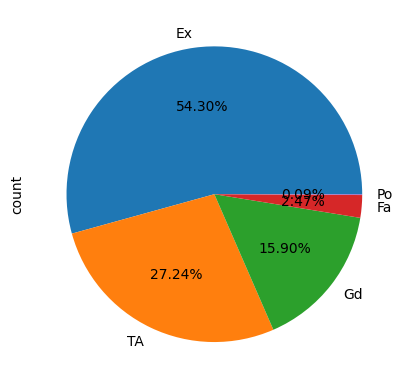

In [ ]:
train_obj['HeatingQC'].value_counts().plot.pie(autopct='%0.2f%%')
show()

In [ ]:
train_obj['HeatingQC']= train_obj['HeatingQC'].replace('Po',1)
train_obj['HeatingQC']= train_obj['HeatingQC'].replace('Fa',2)
train_obj['HeatingQC']= train_obj['HeatingQC'].replace('TA',3)
train_obj['HeatingQC']= train_obj['HeatingQC'].replace('Gd',4)
train_obj['HeatingQC']= train_obj['HeatingQC'].replace('Ex',5)

C:\Users\RPC\AppData\Local\Temp\ipykernel_14640\824846332.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_obj['HeatingQC']= train_obj['HeatingQC'].replace('Ex',5)


In [ ]:
train_obj['HeatingQC'].value_counts()

HeatingQC
5    594
3    298
4    174
2     27
1      1
Name: count, dtype: int64

---------------------------------------------

In [ ]:
# Electrical: Electrical system
# SBrkr (Standard Circuit Breakers & Romex) 
# FuseA (Fuse Box - Amp Service) 
# FuseF (Fuse Box - Fair) 
# FuseP (Fuse Box - Poor) 
# Mix (Mixed) 

train_obj['Electrical'].value_counts() # nominal

Electrical
SBrkr    1009
FuseA      67
FuseF      15
FuseP       2
Mix         1
Name: count, dtype: int64

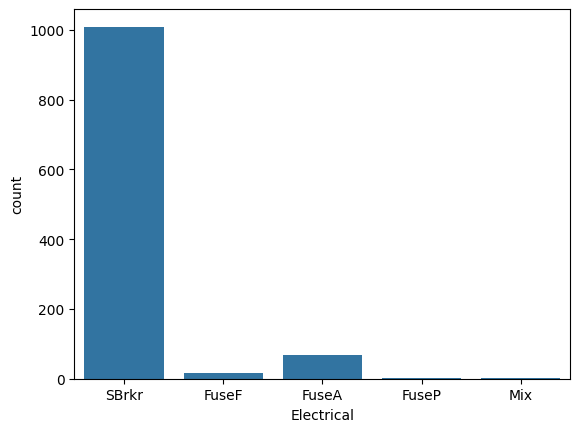

In [ ]:
countplot(x='Electrical', data=df_train)
show()

---------------------------------------------

In [ ]:
# FireplaceQu: Fireplace quality
train_obj['RoofStyle'].value_counts() # nominal

RoofStyle
Gable      843
Hip        230
Gambrel     10
Mansard      6
Flat         5
Name: count, dtype: int64

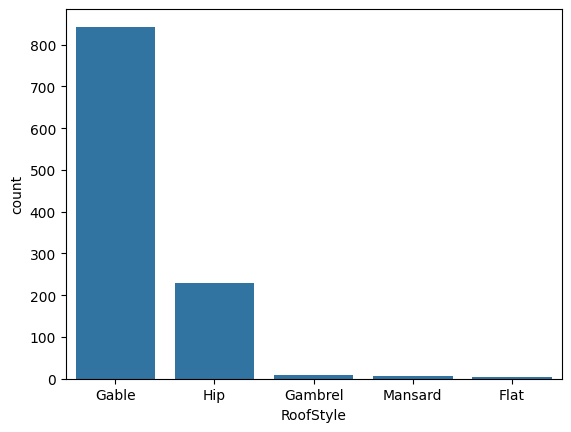

In [ ]:
countplot(x='RoofStyle', data=df_train)
show()

---------------------------------------------

In [ ]:
# GarageQual: Garage quality
# Ex (Excellent) 
# Gd (Good) 
# TA (Typical/Average) 
# Fa (Fair) 
# Po (Poor)

train_obj['GarageQual'].value_counts() # ordinal

GarageQual
TA    1031
Fa      46
Gd      11
Ex       3
Po       3
Name: count, dtype: int64

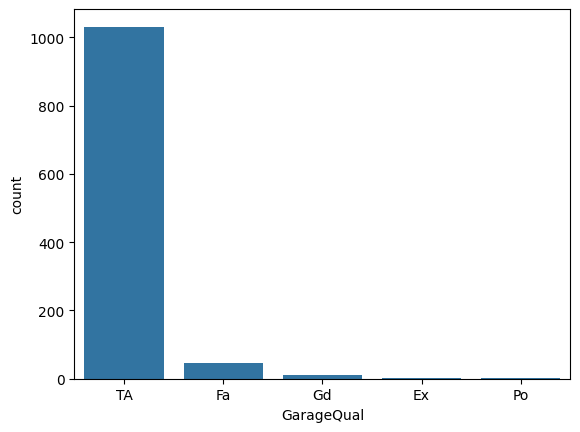

In [ ]:
countplot(x='GarageQual', data=df_train)
show()

In [ ]:
train_obj['GarageQual']= train_obj['GarageQual'].replace('Po',1)
train_obj['GarageQual']= train_obj['GarageQual'].replace('Fa',2)
train_obj['GarageQual']= train_obj['GarageQual'].replace('TA',3)
train_obj['GarageQual']= train_obj['GarageQual'].replace('Gd',4)
train_obj['GarageQual']= train_obj['GarageQual'].replace('Ex',5)

C:\Users\RPC\AppData\Local\Temp\ipykernel_14640\2665318924.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_obj['GarageQual']= train_obj['GarageQual'].replace('Ex',5)


In [ ]:
train_obj['GarageQual'].value_counts() 

GarageQual
3    1031
2      46
4      11
5       3
1       3
Name: count, dtype: int64

---------------------------------------------

In [ ]:
# GarageCond: Garage condition
# Ex (Excellent) 
# Gd (Good) 
# TA (Typical/Average) 
# Fa (Fair) 
# Po (Poor)

train_obj['GarageCond'].value_counts() # ordinal

GarageCond
TA    1050
Fa      31
Po       6
Gd       5
Ex       2
Name: count, dtype: int64

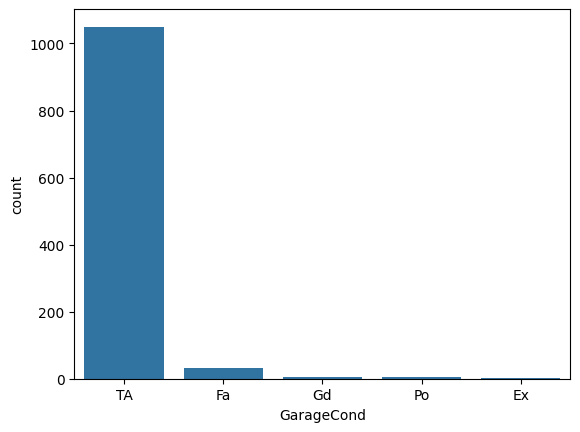

In [ ]:
countplot(x='GarageCond', data=df_train)
show()

In [ ]:
train_obj['GarageCond']= train_obj['GarageCond'].replace('Po',1)
train_obj['GarageCond']= train_obj['GarageCond'].replace('Fa',2)
train_obj['GarageCond']= train_obj['GarageCond'].replace('TA',3)
train_obj['GarageCond']= train_obj['GarageCond'].replace('Gd',4)
train_obj['GarageCond']= train_obj['GarageCond'].replace('Ex',5)

C:\Users\RPC\AppData\Local\Temp\ipykernel_14640\4002507844.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_obj['GarageCond']= train_obj['GarageCond'].replace('Ex',5)


In [ ]:
train_obj['GarageCond'].value_counts() # ordinal

GarageCond
3    1050
2      31
1       6
4       5
5       2
Name: count, dtype: int64

----------------------------------
---------------------------------------------

In [ ]:
for col in train_obj.columns:
    nuniques = train_obj[col].nunique()
    if nuniques == 6  :
        print(f'{col} : {train_obj[col].nunique()}')

Condition2 : 6
BsmtFinType1 : 6
BsmtFinType2 : 6
Functional : 6
GarageType : 6
SaleCondition : 6


---------------------------------------------

In [ ]:
# Condition2: Proximity to main road or railroad (if a second is present)
train_obj['Condition2'].value_counts() # nominal

Condition2
Norm      1082
Feedr        5
Artery       2
RRNn         2
PosN         2
PosA         1
Name: count, dtype: int64

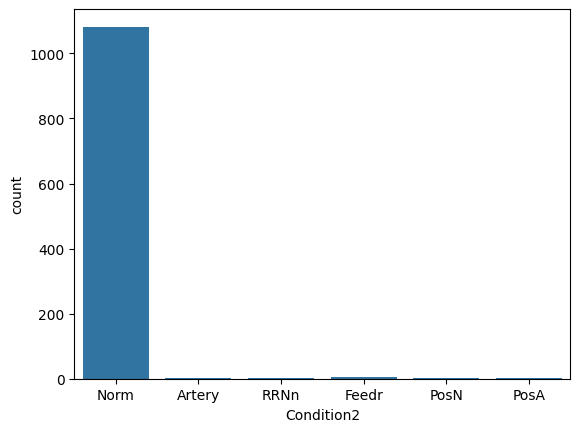

In [ ]:
countplot(x='Condition2', data=df_train)
show()

---------------------------------------------

In [ ]:
# Functional: Home functionality rating
# Typ (Typical) 
# Min2 (Minor Functionality Issue 2) 
# Min1 (Minor Functionality Issue 1)
# Mod (Moderate Functionality Issue) 
# Maj1 (Major Functionality Issue 1) 
# Maj2 (Major Functionality Issue 2) 

train_obj['Functional'].value_counts() # ordinal

Functional
Typ     1024
Min2      25
Min1      21
Maj1      10
Mod       10
Maj2       4
Name: count, dtype: int64

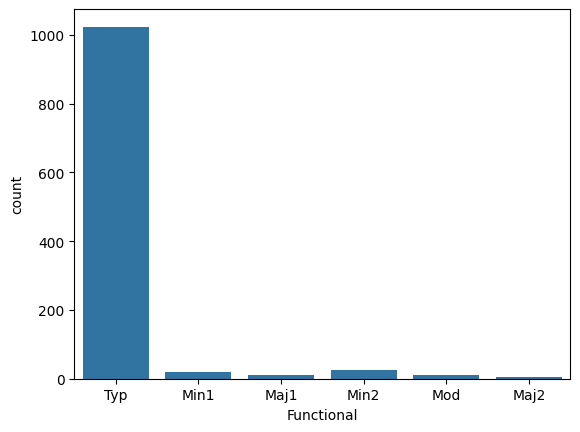

In [ ]:
countplot(x='Functional', data=df_train)
show()

In [ ]:
train_obj['Functional']= train_obj['Functional'].replace('Typ',1)
train_obj['Functional']= train_obj['Functional'].replace('Min2',2)
train_obj['Functional']= train_obj['Functional'].replace('Min1',3)
train_obj['Functional']= train_obj['Functional'].replace('Mod',4)
train_obj['Functional']= train_obj['Functional'].replace('Maj1',5)
train_obj['Functional']= train_obj['Functional'].replace('Maj2',6)

C:\Users\RPC\AppData\Local\Temp\ipykernel_14640\4263619355.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_obj['Functional']= train_obj['Functional'].replace('Maj2',6)


In [ ]:
train_obj['Functional'].value_counts() 

Functional
1    1024
2      25
3      21
5      10
4      10
6       4
Name: count, dtype: int64

---------------------------------------------

In [ ]:
# BsmtFinType1: Quality of basement finished area
# Unf (Unfinished)
# GLQ (Good Living Quality) 
# ALQ (Average Living Quality) 
# Rec (Recreation Room) 
# BLQ (Below Average Living Quality) 
# LwQ (Low Quality) 

train_obj['BsmtFinType1'].value_counts() # ordinal

BsmtFinType1
Unf    343
GLQ    323
ALQ    162
Rec    105
BLQ    105
LwQ     56
Name: count, dtype: int64

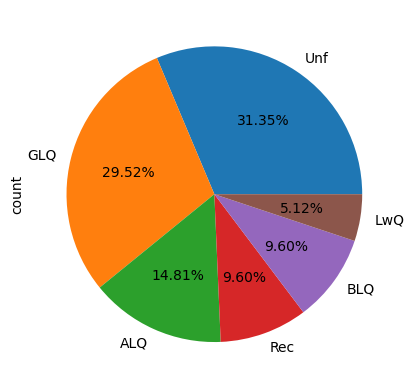

In [ ]:
train_obj['BsmtFinType1'].value_counts().plot.pie(autopct='%0.2f%%')
show()

In [ ]:
train_obj['BsmtFinType1']= train_obj['BsmtFinType1'].replace('Unf',1)
train_obj['BsmtFinType1']= train_obj['BsmtFinType1'].replace('GLQ',2)
train_obj['BsmtFinType1']= train_obj['BsmtFinType1'].replace('ALQ',3)
train_obj['BsmtFinType1']= train_obj['BsmtFinType1'].replace('Rec',4)
train_obj['BsmtFinType1']= train_obj['BsmtFinType1'].replace('BLQ',5)
train_obj['BsmtFinType1']= train_obj['BsmtFinType1'].replace('LwQ',6) 

C:\Users\RPC\AppData\Local\Temp\ipykernel_14640\3546732529.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_obj['BsmtFinType1']= train_obj['BsmtFinType1'].replace('LwQ',6)


In [ ]:
train_obj['BsmtFinType1'].value_counts() 

BsmtFinType1
1    343
2    323
3    162
4    105
5    105
6     56
Name: count, dtype: int64

---------------------------------------------

In [ ]:
# BsmtFinType2: Quality of second finished area (if present)
# Unf (Unfinished)
# GLQ (Good Living Quality) 
# ALQ (Average Living Quality) 
# Rec (Recreation Room) 
# BLQ (Below Average Living Quality) 
# LwQ (Low Quality)

train_obj['BsmtFinType2'].value_counts()  # ordinal

BsmtFinType2
Unf    972
Rec     37
LwQ     35
BLQ     25
ALQ     13
GLQ     12
Name: count, dtype: int64

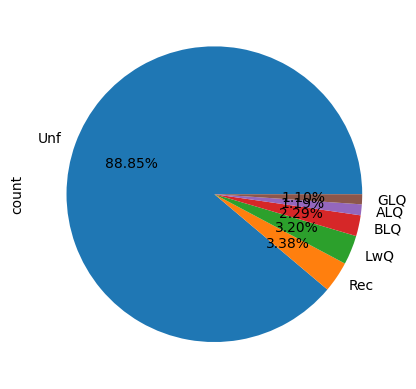

In [ ]:
train_obj['BsmtFinType2'].value_counts().plot.pie(autopct='%0.2f%%')
show()

In [ ]:
train_obj['BsmtFinType2']= train_obj['BsmtFinType2'].replace('Unf',1)
train_obj['BsmtFinType2']= train_obj['BsmtFinType2'].replace('GLQ',2)
train_obj['BsmtFinType2']= train_obj['BsmtFinType2'].replace('ALQ',3)
train_obj['BsmtFinType2']= train_obj['BsmtFinType2'].replace('Rec',4)
train_obj['BsmtFinType2']= train_obj['BsmtFinType2'].replace('BLQ',5)
train_obj['BsmtFinType2']= train_obj['BsmtFinType2'].replace('LwQ',6) 

C:\Users\RPC\AppData\Local\Temp\ipykernel_14640\777848345.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_obj['BsmtFinType2']= train_obj['BsmtFinType2'].replace('LwQ',6)


In [ ]:
train_obj['BsmtFinType2'].value_counts() 

BsmtFinType2
1    972
4     37
6     35
5     25
3     13
2     12
Name: count, dtype: int64

---------------------------------------------

In [ ]:
# GarageType: Garage location
train_obj['GarageType'].value_counts() # nominal   but there is number with string

GarageType
Attchd     680
Detchd     325
BuiltIn     63
Basment     15
CarPort      6
2Types       5
Name: count, dtype: int64

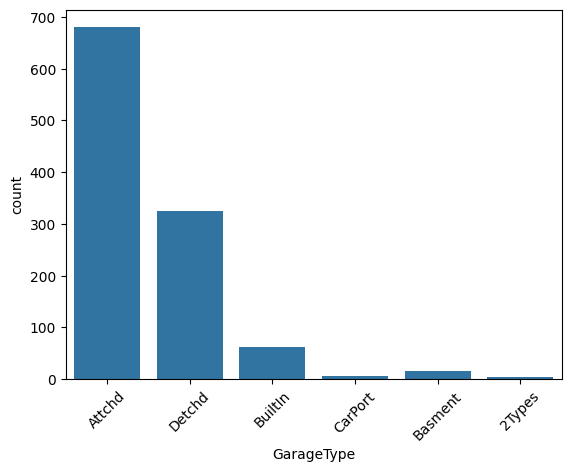

In [ ]:
countplot(x='GarageType', data=df_train)
xticks(rotation=45)
show()

---------------------------------------------

In [ ]:
# SaleCondition: Condition of sale
train_obj['SaleCondition'].value_counts() 

SaleCondition
Normal     880
Partial    119
Abnorml     70
Family      18
Alloca       6
AdjLand      1
Name: count, dtype: int64

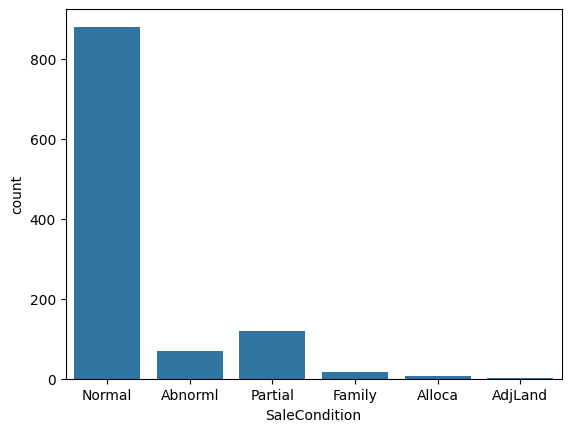

In [ ]:
countplot(x='SaleCondition', data=df_train)
show()

----------------------------------------
---------------------------------------------

In [ ]:
for col in train_obj.columns:
    nuniques = train_obj[col].nunique()
    if nuniques == 7  :
        print(f'{col} : {train_obj[col].nunique()}')

RoofMatl : 7


In [ ]:
# Functional: Home functionality rating
train_obj['RoofMatl'].value_counts() # nominal

RoofMatl
CompShg    1078
WdShngl       6
Tar&Grv       5
WdShake       2
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64

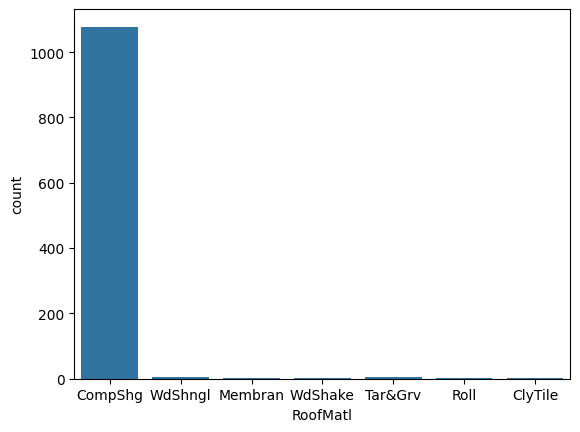

In [ ]:
countplot(x='RoofMatl', data=df_train)
show()

-----------------------------
---------------------------------------------

In [ ]:
for col in train_obj.columns:
    nuniques = train_obj[col].nunique()
    if nuniques >= 8  :
        print(f'{col} : {train_obj[col].nunique()}')

Neighborhood : 25
Condition1 : 9
HouseStyle : 8
Exterior1st : 14
Exterior2nd : 16
SaleType : 9


---------------------------------------------

In [ ]:
# Neighborhood: Physical locations within Ames city limits
train_obj['Neighborhood'].value_counts() # nominal

Neighborhood
NAmes      173
CollgCr    122
OldTown     96
Somerst     75
NridgHt     74
Edwards     65
Gilbert     49
NWAmes      45
Sawyer      44
SawyerW     44
BrkSide     42
Crawfor     41
NoRidge     33
Mitchel     30
Timber      29
IDOTRR      27
StoneBr     20
SWISU       19
BrDale      15
Blmngtn     14
ClearCr     11
MeadowV     10
Veenker      7
NPkVill      7
Blueste      2
Name: count, dtype: int64

---------------------------------------------

In [ ]:
# Condition1: Proximity to main road or railroad
train_obj['Condition1'].value_counts() # nominal

Condition1
Norm      950
Feedr      52
Artery     42
RRAn       24
PosN        9
RRAe        8
RRNn        4
PosA        4
RRNe        1
Name: count, dtype: int64

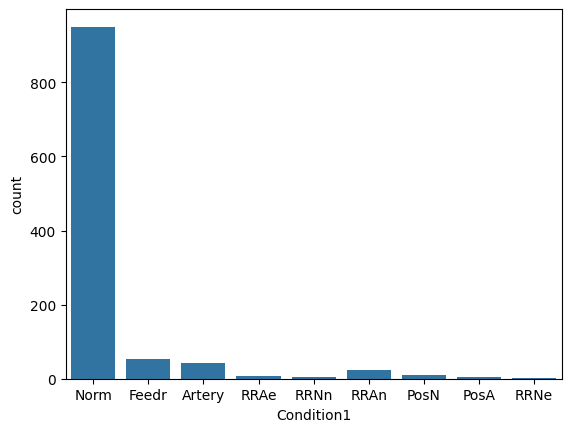

In [ ]:
countplot(x='Condition1', data=df_train)
show()

---------------------------------------------

In [ ]:
# OverallQual: Overall material and finish quality
train_obj['HouseStyle'].value_counts() # nominal   but there is number with string

HouseStyle
1Story    540
2Story    346
1.5Fin    117
SLvl       43
SFoyer     23
1.5Unf     10
2.5Unf      9
2.5Fin      6
Name: count, dtype: int64

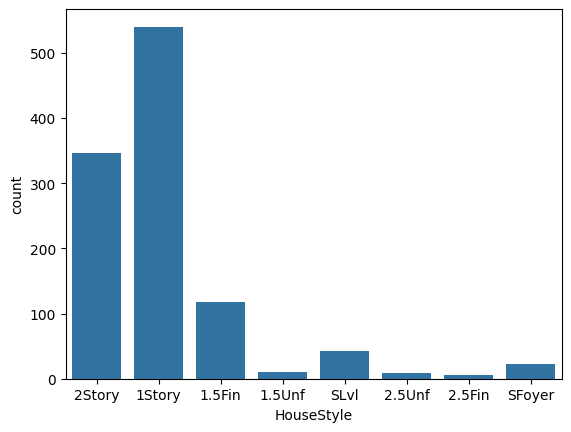

In [ ]:
countplot(x='HouseStyle', data=df_train)
show()

---------------------------------------------

In [ ]:
# Exterior1st: Exterior covering on house
train_obj['Exterior1st'].value_counts() 

Exterior1st
VinylSd    421
MetalSd    172
HdBoard    151
Wd Sdng    149
Plywood     64
CemntBd     45
BrkFace     36
WdShing     20
Stucco      18
AsbShng     14
BrkComm      1
Stone        1
ImStucc      1
CBlock       1
Name: count, dtype: int64

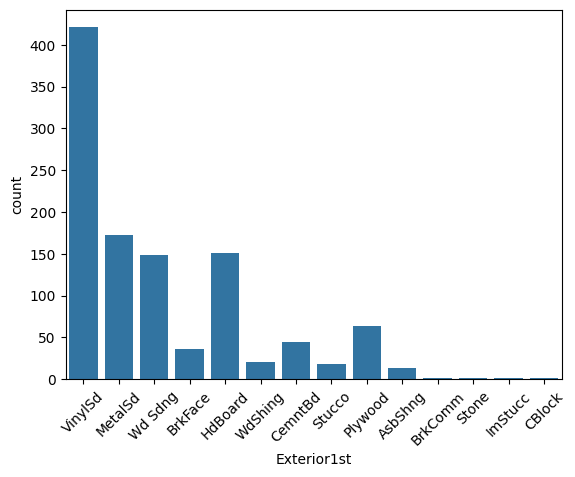

In [ ]:
countplot(x='Exterior1st', data=df_train)
xticks(rotation = 45)
show()

---------------------------------------------

In [ ]:
# Exterior2nd: Exterior covering on house (if more than one material)
train_obj['Exterior2nd'].value_counts()  # nominal

Exterior2nd
VinylSd    412
MetalSd    169
Wd Sdng    145
HdBoard    138
Plywood     82
CmentBd     45
Wd Shng     28
Stucco      20
BrkFace     19
AsbShng     15
ImStucc      9
Brk Cmn      6
AsphShn      2
Stone        2
Other        1
CBlock       1
Name: count, dtype: int64

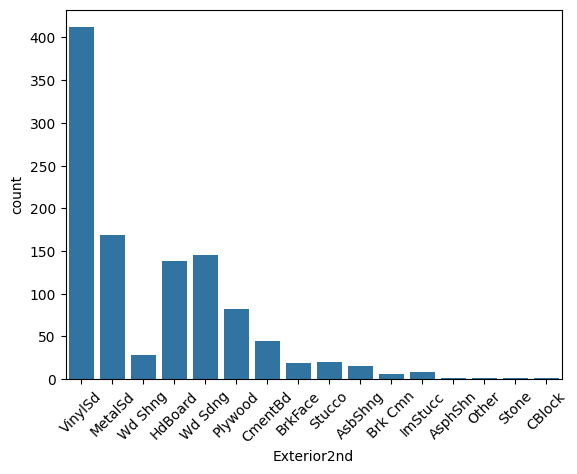

In [ ]:
countplot(x='Exterior2nd', data=df_train)
xticks(rotation=45)
show()

---------------------------------------------

In [ ]:
# SaleType: Type of sale
train_obj['SaleType'].value_counts() # nominal

SaleType
WD       928
New      116
COD       31
ConLD      5
CWD        4
ConLw      4
ConLI      3
Con        2
Oth        1
Name: count, dtype: int64

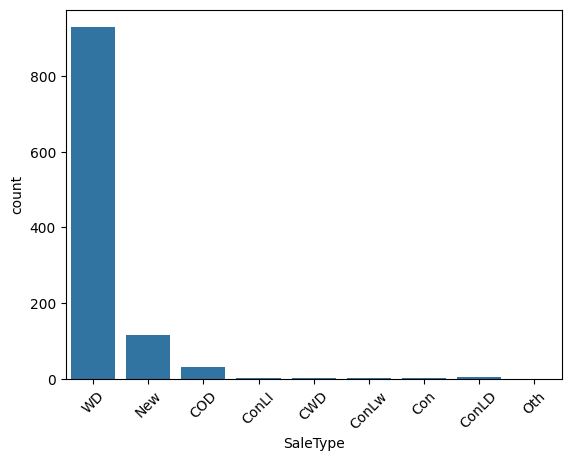

In [ ]:
countplot(x='SaleType', data=df_train)
xticks(rotation=45)
show()

--------------------------------------

In [ ]:
train_obj

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,1,1,AllPub,1,1,CollgCr,Norm,Norm,...,SBrkr,3,1,Attchd,2,3,3,1,WD,Normal
1,RL,Pave,1,1,AllPub,4,1,Veenker,Feedr,Norm,...,SBrkr,2,1,Attchd,2,3,3,1,WD,Normal
2,RL,Pave,2,1,AllPub,1,1,CollgCr,Norm,Norm,...,SBrkr,3,1,Attchd,2,3,3,1,WD,Normal
3,RL,Pave,2,1,AllPub,2,1,Crawfor,Norm,Norm,...,SBrkr,3,1,Detchd,1,3,3,1,WD,Abnorml
4,RL,Pave,2,1,AllPub,4,1,NoRidge,Norm,Norm,...,SBrkr,3,1,Attchd,2,3,3,1,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,1,1,AllPub,1,1,Gilbert,Norm,Norm,...,SBrkr,2,1,Attchd,2,3,3,1,WD,Normal
1456,RL,Pave,1,1,AllPub,1,1,NWAmes,Norm,Norm,...,SBrkr,2,3,Attchd,1,3,3,1,WD,Normal
1457,RL,Pave,1,1,AllPub,1,1,Crawfor,Norm,Norm,...,SBrkr,3,1,Attchd,2,3,3,1,WD,Normal
1458,RL,Pave,1,1,AllPub,1,1,NAmes,Norm,Norm,...,FuseA,3,1,Attchd,1,3,3,1,WD,Normal


In [ ]:
train_data = concat([train_non_obj,train_obj],axis=1)

In [ ]:
train_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,65.0,8450,7,5,2003,2003,196.000000,706,150,...,SBrkr,3,1,Attchd,2,3,3,1,WD,Normal
1,20,80.0,9600,6,8,1976,1976,263.557018,978,284,...,SBrkr,2,1,Attchd,2,3,3,1,WD,Normal
2,60,68.0,11250,7,5,2001,2002,162.000000,486,434,...,SBrkr,3,1,Attchd,2,3,3,1,WD,Normal
3,70,60.0,9550,7,5,1915,1970,263.557018,216,540,...,SBrkr,3,1,Detchd,1,3,3,1,WD,Abnorml
4,60,84.0,14260,8,5,2000,2000,350.000000,655,490,...,SBrkr,3,1,Attchd,2,3,3,1,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,263.557018,0,953,...,SBrkr,2,1,Attchd,2,3,3,1,WD,Normal
1456,20,85.0,13175,6,6,1978,1988,119.000000,790,589,...,SBrkr,2,3,Attchd,1,3,3,1,WD,Normal
1457,70,66.0,9042,7,9,1941,2006,263.557018,275,877,...,SBrkr,3,1,Attchd,2,3,3,1,WD,Normal
1458,20,68.0,9717,5,6,1950,1996,263.557018,49,0,...,FuseA,3,1,Attchd,1,3,3,1,WD,Normal


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1094 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1094 non-null   int64  
 1   LotFrontage    1094 non-null   float64
 2   LotArea        1094 non-null   int64  
 3   OverallQual    1094 non-null   int64  
 4   OverallCond    1094 non-null   int64  
 5   YearBuilt      1094 non-null   int64  
 6   YearRemodAdd   1094 non-null   int64  
 7   MasVnrArea     1094 non-null   float64
 8   BsmtFinSF1     1094 non-null   int64  
 9   BsmtUnfSF      1094 non-null   int64  
 10  TotalBsmtSF    1094 non-null   int64  
 11  1stFlrSF       1094 non-null   int64  
 12  2ndFlrSF       1094 non-null   int64  
 13  GrLivArea      1094 non-null   int64  
 14  BsmtFullBath   1094 non-null   int64  
 15  FullBath       1094 non-null   int64  
 16  HalfBath       1094 non-null   int64  
 17  BedroomAbvGr   1094 non-null   int64  
 18  KitchenAbvGr 

----------------------------------
---------------------------------------------

In [ ]:
train_obj2 = train_data.select_dtypes(include='object')
train_non_obj2 = train_data.select_dtypes(exclude='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for i in range(0,train_obj2.shape[1]):
    train_obj2.iloc[:,i]=label.fit_transform(train_obj2.iloc[:,i])

train_obj2 = train_obj2.astype(int)

In [ ]:
train_obj2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1094 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSZoning       1094 non-null   int32
 1   Street         1094 non-null   int32
 2   Utilities      1094 non-null   int32
 3   Neighborhood   1094 non-null   int32
 4   Condition1     1094 non-null   int32
 5   Condition2     1094 non-null   int32
 6   BldgType       1094 non-null   int32
 7   HouseStyle     1094 non-null   int32
 8   RoofStyle      1094 non-null   int32
 9   RoofMatl       1094 non-null   int32
 10  Exterior1st    1094 non-null   int32
 11  Exterior2nd    1094 non-null   int32
 12  Foundation     1094 non-null   int32
 13  Heating        1094 non-null   int32
 14  CentralAir     1094 non-null   int32
 15  Electrical     1094 non-null   int32
 16  GarageType     1094 non-null   int32
 17  SaleType       1094 non-null   int32
 18  SaleCondition  1094 non-null   int32
dtypes: int32(19

In [ ]:
final_train_data = concat([train_non_obj2,train_obj2],axis=1)

In [ ]:
final_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1094 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1094 non-null   int64  
 1   LotFrontage    1094 non-null   float64
 2   LotArea        1094 non-null   int64  
 3   OverallQual    1094 non-null   int64  
 4   OverallCond    1094 non-null   int64  
 5   YearBuilt      1094 non-null   int64  
 6   YearRemodAdd   1094 non-null   int64  
 7   MasVnrArea     1094 non-null   float64
 8   BsmtFinSF1     1094 non-null   int64  
 9   BsmtUnfSF      1094 non-null   int64  
 10  TotalBsmtSF    1094 non-null   int64  
 11  1stFlrSF       1094 non-null   int64  
 12  2ndFlrSF       1094 non-null   int64  
 13  GrLivArea      1094 non-null   int64  
 14  BsmtFullBath   1094 non-null   int64  
 15  FullBath       1094 non-null   int64  
 16  HalfBath       1094 non-null   int64  
 17  BedroomAbvGr   1094 non-null   int64  
 18  KitchenAbvGr 

In [ ]:
final_train_data.shape

(1094, 65)

In [ ]:
final_train_data['LotShape'].value_counts()

LotShape
1    760
2    301
3     26
4      7
Name: count, dtype: int64

In [ ]:
final_train_data['KitchenQual'].value_counts()

KitchenQual
2    528
3    454
4     91
1     21
Name: count, dtype: int64

-------------------------------------
----------------------------------------
-------------------------------------- 

### **Spliting Data to train data and test data**

------------------------

In [ ]:
X= final_train_data.drop(['SalePrice'],axis=1)
y= final_train_data['SalePrice']

x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=1234)

In [ ]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(875, 64) (219, 64)
(875,) (219,)


-------------------

## **Creating Model**

---------------------------

In [ ]:
r_2=[]
mse =[]
rmse=[]
mae=[]

def reg(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)

    R2 = r2_score(y_test,pred)
    MSE = mean_squared_error(y_test,pred)
    RMSE = sqrt(mean_squared_error(y_test,pred))
    MAE = mean_absolute_error(y_test,pred)
    
    r_2.append(R2)
    mse.append(MSE)
    rmse.append(RMSE)
    mae.append(MAE)

In [ ]:
Ridge_model = Ridge()
LinearRegression_model = LinearRegression()
XGBRegressor_model = XGBRegressor()

In [ ]:
Algorithms = ['LinearRegression','Ridge','XGBRegressor']

In [ ]:
reg(LinearRegression_model)
reg(Ridge_model)
reg(XGBRegressor_model)

In [ ]:
result = DataFrame({'Algorithms':Algorithms,'R2':r_2,'mse':mse,'rmse':rmse,'mae':mae})
result

,Algorithms,R2,mse,rmse,mae
0,LinearRegression,0.847332,1.072496e+09,32748.978489,22774.849468
1,Ridge,0.847083,1.074246e+09,32775.698097,22739.600975
2,XGBRegressor,0.884478,8.115416e+08,28487.568657,18410.429688


#### **Comparison of Algorithms:**

- ##### **XGBRegressor stands out as the best-performing algorithm among the three**:
- ##### It has the highest R2 value (0.88448), indicating that it explains a significantly larger proportion of the variance in the target variable compared to Linear Regression and Ridge.
- ##### It has the lowest mse (811,541,568.0), rmse (28,487.57), and mae (18,410.43), which means its predictions have the smallest average errors.
- ##### **Linear Regression and Ridge perform very similarly:**
- ##### Their R2 values are almost identical (around 0.847).
- ##### Their mse, rmse, and mae values are also very close, indicating similar levels of prediction error. Ridge's mae is slightly lower than Linear Regression's, but the difference is minimal.

------------------------

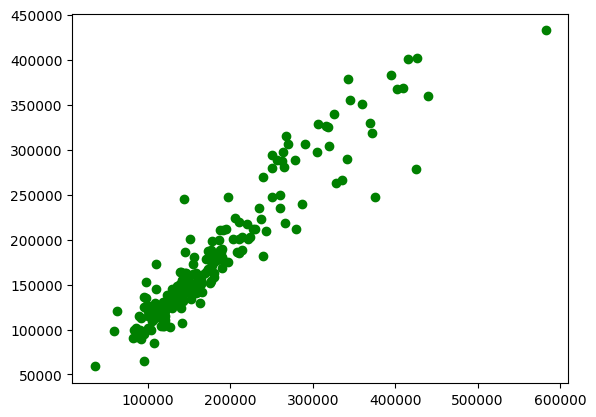

In [ ]:
XGBRegressor_model.fit(x_train,y_train)
pred = XGBRegressor_model.predict(x_test)
scatter(y_test, pred, color='g')
show()

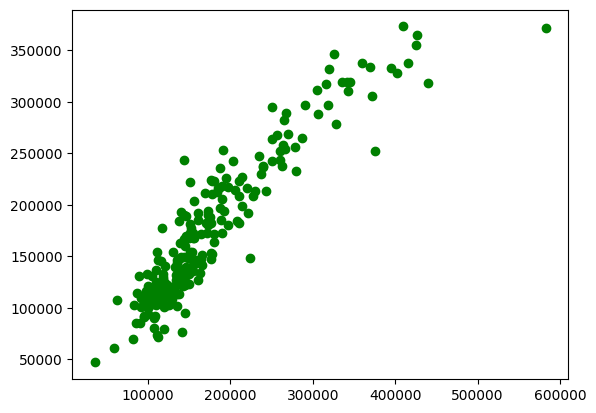

In [ ]:
Ridge_model.fit(x_train,y_train)
pred = Ridge_model.predict(x_test)
scatter(y_test, pred, color='g')
show()

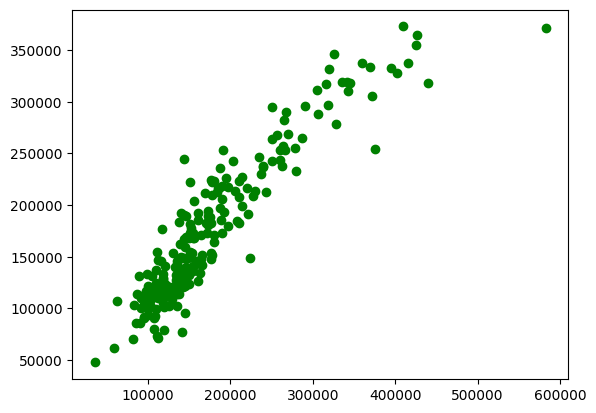

In [ ]:
LinearRegression_model.fit(x_train,y_train)
pred = LinearRegression_model.predict(x_test)
scatter(y_test, pred, color='g')
show()

In [ ]:
# with open('XGBRegressor_model' , 'wb') as f :
#     dump(XGBRegressor_model, f)

--------------------------

# <center><strong>Conclusion</strong></center>
--------------------------------------

#### **Based on these evaluation metrics, the XGBRegressor is the superior model for this regression task. It demonstrates significantly better predictive power by explaining more variance and achieving lower error rates compared to both Linear Regression and Ridge. This suggests that the underlying data might have non-linear relationships that XGBRegressor is better equipped to capture.**

----------------------------------------

In [ ]:
# !jupyter nbconvert --to html "House Price prediction.ipynb"

[NbConvertApp] Converting notebook House Price prediction.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 55 image(s).
[NbConvertApp] Writing 4155283 bytes to House Price prediction.html
